<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W2DAY12_XOR_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W2DAY12: XOR Neural Network

Goal - Train a neural network to learn the XOR truth table.

- how to solve the classic XOR problem using a small neural network.
- how non-linear models can learn relationships that linear models cannot.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
# XOR input and output data
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
Y = torch.tensor([[0.], [1.], [1.], [0.]])
X.shape, Y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

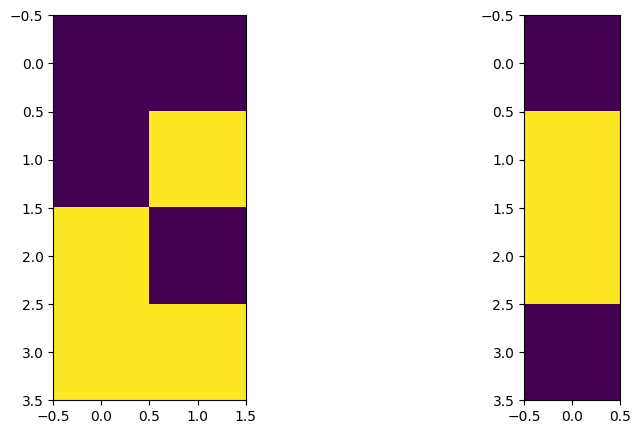

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X)
ax[1].imshow(Y)

In [11]:
# define a small xor feedforward nn

class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return torch.sigmoid(self.fc2(x))


In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:', device)

device: cpu


In [13]:
model = XORNet().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [16]:
for epoch in range(1000):
    model.train()
    running_loss = 0.0
    # Explicitly name the 'total' argument for clarity and to avoid potential misinterpretation
    for x, y in tqdm(zip(X, Y), total=len(X)):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(X)}')


100%|██████████| 4/4 [00:00<00:00, 98.11it/s]


Epoch 1, Loss: 0.7279864102602005



100%|██████████| 4/4 [00:00<00:00, 659.92it/s]


Epoch 2, Loss: 0.7244100570678711



100%|██████████| 4/4 [00:00<00:00, 696.84it/s]


Epoch 3, Loss: 0.7219752669334412



100%|██████████| 4/4 [00:00<00:00, 864.18it/s]


Epoch 4, Loss: 0.7203165888786316



100%|██████████| 4/4 [00:00<00:00, 809.95it/s]


Epoch 5, Loss: 0.7191839218139648



100%|██████████| 4/4 [00:00<00:00, 836.60it/s]


Epoch 6, Loss: 0.7184067666530609



100%|██████████| 4/4 [00:00<00:00, 663.08it/s]


Epoch 7, Loss: 0.7178695052862167



100%|██████████| 4/4 [00:00<00:00, 844.39it/s]


Epoch 8, Loss: 0.717493861913681



100%|██████████| 4/4 [00:00<00:00, 935.08it/s]


Epoch 9, Loss: 0.7172272056341171



100%|██████████| 4/4 [00:00<00:00, 1038.00it/s]


Epoch 10, Loss: 0.7170337289571762



100%|██████████| 4/4 [00:00<00:00, 885.86it/s]


Epoch 11, Loss: 0.7168894708156586



100%|██████████| 4/4 [00:00<00:00, 932.90it/s]


Epoch 12, Loss: 0.7167783677577972



100%|██████████| 4/4 [00:00<00:00, 853.72it/s]


Epoch 13, Loss: 0.7166894972324371



100%|██████████| 4/4 [00:00<00:00, 832.74it/s]


Epoch 14, Loss: 0.7166155725717545



100%|██████████| 4/4 [00:00<00:00, 731.54it/s]


Epoch 15, Loss: 0.7165516912937164



100%|██████████| 4/4 [00:00<00:00, 796.56it/s]


Epoch 16, Loss: 0.7164945006370544



100%|██████████| 4/4 [00:00<00:00, 804.24it/s]


Epoch 17, Loss: 0.716441810131073



100%|██████████| 4/4 [00:00<00:00, 759.25it/s]


Epoch 18, Loss: 0.7163922190666199



100%|██████████| 4/4 [00:00<00:00, 540.19it/s]


Epoch 19, Loss: 0.7163446098566055



100%|██████████| 4/4 [00:00<00:00, 460.03it/s]


Epoch 20, Loss: 0.7162984162569046



100%|██████████| 4/4 [00:00<00:00, 493.80it/s]


Epoch 21, Loss: 0.7162531167268753



100%|██████████| 4/4 [00:00<00:00, 489.06it/s]


Epoch 22, Loss: 0.7162083834409714



100%|██████████| 4/4 [00:00<00:00, 436.80it/s]


Epoch 23, Loss: 0.7161640524864197



100%|██████████| 4/4 [00:00<00:00, 603.89it/s]


Epoch 24, Loss: 0.7161199897527695



100%|██████████| 4/4 [00:00<00:00, 715.51it/s]


Epoch 25, Loss: 0.7160761058330536



100%|██████████| 4/4 [00:00<00:00, 698.21it/s]


Epoch 26, Loss: 0.7160323560237885



100%|██████████| 4/4 [00:00<00:00, 760.56it/s]


Epoch 27, Loss: 0.7159886509180069



100%|██████████| 4/4 [00:00<00:00, 795.58it/s]


Epoch 28, Loss: 0.7159449905157089



100%|██████████| 4/4 [00:00<00:00, 738.24it/s]


Epoch 29, Loss: 0.7159013599157333



100%|██████████| 4/4 [00:00<00:00, 759.70it/s]


Epoch 30, Loss: 0.7158577293157578



100%|██████████| 4/4 [00:00<00:00, 764.83it/s]


Epoch 31, Loss: 0.7158140987157822



100%|██████████| 4/4 [00:00<00:00, 656.69it/s]


Epoch 32, Loss: 0.7157704085111618



100%|██████████| 4/4 [00:00<00:00, 710.57it/s]


Epoch 33, Loss: 0.7157268077135086



100%|██████████| 4/4 [00:00<00:00, 794.23it/s]


Epoch 34, Loss: 0.7156830728054047



100%|██████████| 4/4 [00:00<00:00, 489.37it/s]


Epoch 35, Loss: 0.7156393975019455



100%|██████████| 4/4 [00:00<00:00, 682.56it/s]


Epoch 36, Loss: 0.7155955731868744



100%|██████████| 4/4 [00:00<00:00, 496.04it/s]


Epoch 37, Loss: 0.7155517935752869



100%|██████████| 4/4 [00:00<00:00, 672.57it/s]


Epoch 38, Loss: 0.7155080139636993



100%|██████████| 4/4 [00:00<00:00, 495.81it/s]


Epoch 39, Loss: 0.7154641598463058



100%|██████████| 4/4 [00:00<00:00, 898.14it/s]


Epoch 40, Loss: 0.7154203057289124



100%|██████████| 4/4 [00:00<00:00, 836.06it/s]


Epoch 41, Loss: 0.7153763473033905



100%|██████████| 4/4 [00:00<00:00, 789.66it/s]


Epoch 42, Loss: 0.7153323441743851



100%|██████████| 4/4 [00:00<00:00, 830.56it/s]


Epoch 43, Loss: 0.7152883112430573



100%|██████████| 4/4 [00:00<00:00, 902.19it/s]


Epoch 44, Loss: 0.7152442187070847



100%|██████████| 4/4 [00:00<00:00, 994.56it/s]


Epoch 45, Loss: 0.7152000963687897



100%|██████████| 4/4 [00:00<00:00, 893.83it/s]


Epoch 46, Loss: 0.715155839920044



100%|██████████| 4/4 [00:00<00:00, 753.52it/s]


Epoch 47, Loss: 0.715111568570137



100%|██████████| 4/4 [00:00<00:00, 833.57it/s]


Epoch 48, Loss: 0.7150671929121017



100%|██████████| 4/4 [00:00<00:00, 825.28it/s]


Epoch 49, Loss: 0.7150227427482605



100%|██████████| 4/4 [00:00<00:00, 829.12it/s]


Epoch 50, Loss: 0.7149782478809357



100%|██████████| 4/4 [00:00<00:00, 798.99it/s]


Epoch 51, Loss: 0.7149337083101273



100%|██████████| 4/4 [00:00<00:00, 876.37it/s]


Epoch 52, Loss: 0.7148889750242233



100%|██████████| 4/4 [00:00<00:00, 971.86it/s]


Epoch 53, Loss: 0.7148442566394806



100%|██████████| 4/4 [00:00<00:00, 874.45it/s]


Epoch 54, Loss: 0.7147993892431259



100%|██████████| 4/4 [00:00<00:00, 826.30it/s]


Epoch 55, Loss: 0.7147544175386429



100%|██████████| 4/4 [00:00<00:00, 821.49it/s]


Epoch 56, Loss: 0.7147093862295151



100%|██████████| 4/4 [00:00<00:00, 829.94it/s]


Epoch 57, Loss: 0.7146642804145813



100%|██████████| 4/4 [00:00<00:00, 801.01it/s]


Epoch 58, Loss: 0.714619055390358



100%|██████████| 4/4 [00:00<00:00, 782.23it/s]


Epoch 59, Loss: 0.7145736217498779



100%|██████████| 4/4 [00:00<00:00, 781.75it/s]


Epoch 60, Loss: 0.7145282328128815



100%|██████████| 4/4 [00:00<00:00, 765.10it/s]


Epoch 61, Loss: 0.7144826501607895



100%|██████████| 4/4 [00:00<00:00, 738.14it/s]


Epoch 62, Loss: 0.7144369333982468



100%|██████████| 4/4 [00:00<00:00, 758.74it/s]


Epoch 63, Loss: 0.7143911421298981



100%|██████████| 4/4 [00:00<00:00, 777.59it/s]


Epoch 64, Loss: 0.7143451869487762



100%|██████████| 4/4 [00:00<00:00, 650.71it/s]


Epoch 65, Loss: 0.7142990976572037



100%|██████████| 4/4 [00:00<00:00, 761.56it/s]


Epoch 66, Loss: 0.7142529487609863



100%|██████████| 4/4 [00:00<00:00, 720.49it/s]


Epoch 67, Loss: 0.7142065614461899



100%|██████████| 4/4 [00:00<00:00, 829.90it/s]


Epoch 68, Loss: 0.7141600549221039



100%|██████████| 4/4 [00:00<00:00, 865.61it/s]


Epoch 69, Loss: 0.7141135036945343



100%|██████████| 4/4 [00:00<00:00, 764.72it/s]


Epoch 70, Loss: 0.7140667140483856



100%|██████████| 4/4 [00:00<00:00, 751.10it/s]


Epoch 71, Loss: 0.714019849896431



100%|██████████| 4/4 [00:00<00:00, 816.57it/s]


Epoch 72, Loss: 0.7139726877212524



100%|██████████| 4/4 [00:00<00:00, 871.72it/s]


Epoch 73, Loss: 0.7139255255460739



100%|██████████| 4/4 [00:00<00:00, 851.46it/s]


Epoch 74, Loss: 0.7138780951499939



100%|██████████| 4/4 [00:00<00:00, 767.70it/s]


Epoch 75, Loss: 0.7138305604457855



100%|██████████| 4/4 [00:00<00:00, 760.98it/s]


Epoch 76, Loss: 0.713782861828804



100%|██████████| 4/4 [00:00<00:00, 782.63it/s]


Epoch 77, Loss: 0.7137349396944046



100%|██████████| 4/4 [00:00<00:00, 789.74it/s]


Epoch 78, Loss: 0.7136868238449097



100%|██████████| 4/4 [00:00<00:00, 918.59it/s]


Epoch 79, Loss: 0.7136385589838028



100%|██████████| 4/4 [00:00<00:00, 920.96it/s]


Epoch 80, Loss: 0.7135902047157288



100%|██████████| 4/4 [00:00<00:00, 881.90it/s]


Epoch 81, Loss: 0.7135415226221085



100%|██████████| 4/4 [00:00<00:00, 932.43it/s]


Epoch 82, Loss: 0.7134926617145538



100%|██████████| 4/4 [00:00<00:00, 946.80it/s]


Epoch 83, Loss: 0.7134436964988708



100%|██████████| 4/4 [00:00<00:00, 931.08it/s]


Epoch 84, Loss: 0.7133944779634476



100%|██████████| 4/4 [00:00<00:00, 897.18it/s]


Epoch 85, Loss: 0.713345006108284



100%|██████████| 4/4 [00:00<00:00, 810.45it/s]


Epoch 86, Loss: 0.7132954299449921



100%|██████████| 4/4 [00:00<00:00, 908.64it/s]


Epoch 87, Loss: 0.7132455557584763



100%|██████████| 4/4 [00:00<00:00, 887.17it/s]


Epoch 88, Loss: 0.7131954729557037



100%|██████████| 4/4 [00:00<00:00, 848.11it/s]


Epoch 89, Loss: 0.7131452262401581



100%|██████████| 4/4 [00:00<00:00, 555.24it/s]


Epoch 90, Loss: 0.7130947411060333



100%|██████████| 4/4 [00:00<00:00, 414.98it/s]


Epoch 91, Loss: 0.7130439430475235



100%|██████████| 4/4 [00:00<00:00, 267.11it/s]


Epoch 92, Loss: 0.7129929959774017



100%|██████████| 4/4 [00:00<00:00, 448.44it/s]


Epoch 93, Loss: 0.7129417806863785



100%|██████████| 4/4 [00:00<00:00, 880.65it/s]


Epoch 94, Loss: 0.7128903567790985



100%|██████████| 4/4 [00:00<00:00, 894.93it/s]


Epoch 95, Loss: 0.7128386497497559



100%|██████████| 4/4 [00:00<00:00, 860.02it/s]


Epoch 96, Loss: 0.7127867490053177



100%|██████████| 4/4 [00:00<00:00, 948.03it/s]

Epoch 97, Loss: 0.7127345204353333


100%|██████████| 4/4 [00:00<00:00, 850.17it/s]


Epoch 98, Loss: 0.7126820385456085



100%|██████████| 4/4 [00:00<00:00, 825.61it/s]


Epoch 99, Loss: 0.7126293331384659



100%|██████████| 4/4 [00:00<00:00, 917.79it/s]


Epoch 100, Loss: 0.7125763446092606



100%|██████████| 4/4 [00:00<00:00, 955.91it/s]


Epoch 101, Loss: 0.7125230878591537



100%|██████████| 4/4 [00:00<00:00, 889.75it/s]


Epoch 102, Loss: 0.7124695330858231



100%|██████████| 4/4 [00:00<00:00, 891.98it/s]


Epoch 103, Loss: 0.7124157398939133



100%|██████████| 4/4 [00:00<00:00, 969.11it/s]


Epoch 104, Loss: 0.7123616337776184



100%|██████████| 4/4 [00:00<00:00, 1020.33it/s]


Epoch 105, Loss: 0.7123072296380997



100%|██████████| 4/4 [00:00<00:00, 962.27it/s]


Epoch 106, Loss: 0.7122525721788406



100%|██████████| 4/4 [00:00<00:00, 1045.11it/s]


Epoch 107, Loss: 0.7121976166963577



100%|██████████| 4/4 [00:00<00:00, 999.18it/s]


Epoch 108, Loss: 0.712142288684845



100%|██████████| 4/4 [00:00<00:00, 885.06it/s]


Epoch 109, Loss: 0.7120866477489471



100%|██████████| 4/4 [00:00<00:00, 514.42it/s]


Epoch 110, Loss: 0.7120307981967926



100%|██████████| 4/4 [00:00<00:00, 818.16it/s]


Epoch 111, Loss: 0.711974561214447



100%|██████████| 4/4 [00:00<00:00, 601.42it/s]


Epoch 112, Loss: 0.7119179964065552



100%|██████████| 4/4 [00:00<00:00, 665.74it/s]


Epoch 113, Loss: 0.7118611186742783



100%|██████████| 4/4 [00:00<00:00, 472.23it/s]


Epoch 114, Loss: 0.7118038684129715



100%|██████████| 4/4 [00:00<00:00, 729.70it/s]


Epoch 115, Loss: 0.711746335029602



100%|██████████| 4/4 [00:00<00:00, 634.78it/s]


Epoch 116, Loss: 0.7116884738206863



100%|██████████| 4/4 [00:00<00:00, 666.77it/s]


Epoch 117, Loss: 0.7116302102804184



100%|██████████| 4/4 [00:00<00:00, 393.32it/s]


Epoch 118, Loss: 0.7115715891122818



100%|██████████| 4/4 [00:00<00:00, 672.92it/s]


Epoch 119, Loss: 0.7115126550197601



100%|██████████| 4/4 [00:00<00:00, 774.64it/s]


Epoch 120, Loss: 0.7114533185958862



100%|██████████| 4/4 [00:00<00:00, 1069.36it/s]


Epoch 121, Loss: 0.7113936394453049



100%|██████████| 4/4 [00:00<00:00, 952.11it/s]


Epoch 122, Loss: 0.7113335877656937



100%|██████████| 4/4 [00:00<00:00, 837.14it/s]


Epoch 123, Loss: 0.7112731039524078



100%|██████████| 4/4 [00:00<00:00, 923.30it/s]


Epoch 124, Loss: 0.7112122774124146



100%|██████████| 4/4 [00:00<00:00, 854.41it/s]


Epoch 125, Loss: 0.7111511081457138



100%|██████████| 4/4 [00:00<00:00, 1012.08it/s]


Epoch 126, Loss: 0.7110895216464996



100%|██████████| 4/4 [00:00<00:00, 767.52it/s]


Epoch 127, Loss: 0.7110274583101273



100%|██████████| 4/4 [00:00<00:00, 702.65it/s]


Epoch 128, Loss: 0.7109650522470474



100%|██████████| 4/4 [00:00<00:00, 936.12it/s]


Epoch 129, Loss: 0.7109022736549377



100%|██████████| 4/4 [00:00<00:00, 723.75it/s]


Epoch 130, Loss: 0.7108389586210251



100%|██████████| 4/4 [00:00<00:00, 663.52it/s]


Epoch 131, Loss: 0.710775300860405



100%|██████████| 4/4 [00:00<00:00, 698.00it/s]


Epoch 132, Loss: 0.7107112258672714



100%|██████████| 4/4 [00:00<00:00, 849.05it/s]


Epoch 133, Loss: 0.7106467038393021



100%|██████████| 4/4 [00:00<00:00, 691.07it/s]


Epoch 134, Loss: 0.7105816900730133



100%|██████████| 4/4 [00:00<00:00, 810.26it/s]


Epoch 135, Loss: 0.7105163186788559



100%|██████████| 4/4 [00:00<00:00, 737.95it/s]


Epoch 136, Loss: 0.7104504257440567



100%|██████████| 4/4 [00:00<00:00, 785.74it/s]


Epoch 137, Loss: 0.7103841155767441



100%|██████████| 4/4 [00:00<00:00, 1128.11it/s]


Epoch 138, Loss: 0.7103173285722733



100%|██████████| 4/4 [00:00<00:00, 426.52it/s]


Epoch 139, Loss: 0.7102500647306442



100%|██████████| 4/4 [00:00<00:00, 652.68it/s]


Epoch 140, Loss: 0.7101823091506958



100%|██████████| 4/4 [00:00<00:00, 565.69it/s]


Epoch 141, Loss: 0.710114136338234



100%|██████████| 4/4 [00:00<00:00, 817.60it/s]


Epoch 142, Loss: 0.7100453674793243



100%|██████████| 4/4 [00:00<00:00, 928.71it/s]


Epoch 143, Loss: 0.7099761962890625



100%|██████████| 4/4 [00:00<00:00, 789.37it/s]


Epoch 144, Loss: 0.7099064737558365



100%|██████████| 4/4 [00:00<00:00, 854.93it/s]


Epoch 145, Loss: 0.7098363041877747



100%|██████████| 4/4 [00:00<00:00, 867.26it/s]


Epoch 146, Loss: 0.7097656428813934



100%|██████████| 4/4 [00:00<00:00, 468.69it/s]


Epoch 147, Loss: 0.7096943557262421



100%|██████████| 4/4 [00:00<00:00, 467.80it/s]


Epoch 148, Loss: 0.7096226662397385



100%|██████████| 4/4 [00:00<00:00, 796.22it/s]


Epoch 149, Loss: 0.7095503062009811



100%|██████████| 4/4 [00:00<00:00, 776.11it/s]


Epoch 150, Loss: 0.709477499127388



100%|██████████| 4/4 [00:00<00:00, 848.79it/s]


Epoch 151, Loss: 0.7094041407108307



100%|██████████| 4/4 [00:00<00:00, 679.46it/s]


Epoch 152, Loss: 0.709330216050148



100%|██████████| 4/4 [00:00<00:00, 838.44it/s]


Epoch 153, Loss: 0.7092556953430176



100%|██████████| 4/4 [00:00<00:00, 805.16it/s]


Epoch 154, Loss: 0.7091806828975677



100%|██████████| 4/4 [00:00<00:00, 795.32it/s]


Epoch 155, Loss: 0.7091050893068314



100%|██████████| 4/4 [00:00<00:00, 813.76it/s]


Epoch 156, Loss: 0.7090288698673248



100%|██████████| 4/4 [00:00<00:00, 826.42it/s]


Epoch 157, Loss: 0.7089520245790482



100%|██████████| 4/4 [00:00<00:00, 980.44it/s]


Epoch 158, Loss: 0.7088747173547745



100%|██████████| 4/4 [00:00<00:00, 766.54it/s]


Epoch 159, Loss: 0.7087967693805695



100%|██████████| 4/4 [00:00<00:00, 799.75it/s]


Epoch 160, Loss: 0.7087181955575943



100%|██████████| 4/4 [00:00<00:00, 778.09it/s]


Epoch 161, Loss: 0.7086389809846878



100%|██████████| 4/4 [00:00<00:00, 926.82it/s]


Epoch 162, Loss: 0.7085590958595276



100%|██████████| 4/4 [00:00<00:00, 755.36it/s]


Epoch 163, Loss: 0.7084786742925644



100%|██████████| 4/4 [00:00<00:00, 717.86it/s]


Epoch 164, Loss: 0.708397701382637



100%|██████████| 4/4 [00:00<00:00, 771.93it/s]


Epoch 165, Loss: 0.7083159387111664



100%|██████████| 4/4 [00:00<00:00, 755.36it/s]


Epoch 166, Loss: 0.7082335352897644



100%|██████████| 4/4 [00:00<00:00, 824.11it/s]


Epoch 167, Loss: 0.7081505358219147



100%|██████████| 4/4 [00:00<00:00, 415.85it/s]


Epoch 168, Loss: 0.7080667912960052



100%|██████████| 4/4 [00:00<00:00, 712.05it/s]


Epoch 169, Loss: 0.7079824954271317



100%|██████████| 4/4 [00:00<00:00, 660.60it/s]


Epoch 170, Loss: 0.7078973650932312



100%|██████████| 4/4 [00:00<00:00, 819.88it/s]


Epoch 171, Loss: 0.7078116536140442



100%|██████████| 4/4 [00:00<00:00, 876.46it/s]


Epoch 172, Loss: 0.7077252119779587



100%|██████████| 4/4 [00:00<00:00, 739.21it/s]


Epoch 173, Loss: 0.7076380997896194



100%|██████████| 4/4 [00:00<00:00, 650.91it/s]


Epoch 174, Loss: 0.7075502276420593



100%|██████████| 4/4 [00:00<00:00, 707.84it/s]


Epoch 175, Loss: 0.7074617296457291



100%|██████████| 4/4 [00:00<00:00, 730.11it/s]


Epoch 176, Loss: 0.7073724120855331



100%|██████████| 4/4 [00:00<00:00, 809.48it/s]


Epoch 177, Loss: 0.7072823941707611



100%|██████████| 4/4 [00:00<00:00, 755.25it/s]


Epoch 178, Loss: 0.7071916460990906



100%|██████████| 4/4 [00:00<00:00, 738.21it/s]


Epoch 179, Loss: 0.7071000933647156



100%|██████████| 4/4 [00:00<00:00, 746.02it/s]


Epoch 180, Loss: 0.7070077508687973



100%|██████████| 4/4 [00:00<00:00, 618.95it/s]


Epoch 181, Loss: 0.7069147378206253



100%|██████████| 4/4 [00:00<00:00, 667.56it/s]


Epoch 182, Loss: 0.7068209201097488



100%|██████████| 4/4 [00:00<00:00, 434.83it/s]


Epoch 183, Loss: 0.7067262828350067



100%|██████████| 4/4 [00:00<00:00, 706.17it/s]


Epoch 184, Loss: 0.7066309005022049



100%|██████████| 4/4 [00:00<00:00, 389.80it/s]


Epoch 185, Loss: 0.7065346837043762



100%|██████████| 4/4 [00:00<00:00, 382.50it/s]


Epoch 186, Loss: 0.7064376771450043



100%|██████████| 4/4 [00:00<00:00, 680.40it/s]


Epoch 187, Loss: 0.7063397914171219



100%|██████████| 4/4 [00:00<00:00, 655.44it/s]


Epoch 188, Loss: 0.7062411159276962



100%|██████████| 4/4 [00:00<00:00, 853.67it/s]


Epoch 189, Loss: 0.7061416357755661



100%|██████████| 4/4 [00:00<00:00, 800.67it/s]


Epoch 190, Loss: 0.7060412615537643



100%|██████████| 4/4 [00:00<00:00, 864.45it/s]


Epoch 191, Loss: 0.7059401273727417



100%|██████████| 4/4 [00:00<00:00, 974.29it/s]


Epoch 192, Loss: 0.7058379948139191



100%|██████████| 4/4 [00:00<00:00, 659.64it/s]


Epoch 193, Loss: 0.7057351171970367



100%|██████████| 4/4 [00:00<00:00, 670.82it/s]


Epoch 194, Loss: 0.705631285905838



100%|██████████| 4/4 [00:00<00:00, 670.71it/s]


Epoch 195, Loss: 0.7055265754461288



100%|██████████| 4/4 [00:00<00:00, 617.38it/s]


Epoch 196, Loss: 0.7054209262132645



100%|██████████| 4/4 [00:00<00:00, 722.97it/s]


Epoch 197, Loss: 0.7053144425153732



100%|██████████| 4/4 [00:00<00:00, 871.91it/s]


Epoch 198, Loss: 0.705206960439682



100%|██████████| 4/4 [00:00<00:00, 832.82it/s]


Epoch 199, Loss: 0.7050985991954803



100%|██████████| 4/4 [00:00<00:00, 438.90it/s]


Epoch 200, Loss: 0.7049892693758011



100%|██████████| 4/4 [00:00<00:00, 362.37it/s]


Epoch 201, Loss: 0.7048789858818054



100%|██████████| 4/4 [00:00<00:00, 702.62it/s]


Epoch 202, Loss: 0.7047678232192993



100%|██████████| 4/4 [00:00<00:00, 870.77it/s]


Epoch 203, Loss: 0.7046556025743484



100%|██████████| 4/4 [00:00<00:00, 864.09it/s]


Epoch 204, Loss: 0.7045423835515976



100%|██████████| 4/4 [00:00<00:00, 925.38it/s]


Epoch 205, Loss: 0.7044283002614975



100%|██████████| 4/4 [00:00<00:00, 907.96it/s]


Epoch 206, Loss: 0.704313114285469



100%|██████████| 4/4 [00:00<00:00, 921.98it/s]


Epoch 207, Loss: 0.7041969895362854



100%|██████████| 4/4 [00:00<00:00, 710.66it/s]


Epoch 208, Loss: 0.7040798515081406



100%|██████████| 4/4 [00:00<00:00, 915.84it/s]


Epoch 209, Loss: 0.7039616107940674



100%|██████████| 4/4 [00:00<00:00, 848.83it/s]


Epoch 210, Loss: 0.7038423866033554



100%|██████████| 4/4 [00:00<00:00, 939.48it/s]


Epoch 211, Loss: 0.7037221193313599



100%|██████████| 4/4 [00:00<00:00, 935.65it/s]


Epoch 212, Loss: 0.703600749373436



100%|██████████| 4/4 [00:00<00:00, 891.08it/s]


Epoch 213, Loss: 0.7034783363342285



100%|██████████| 4/4 [00:00<00:00, 745.99it/s]


Epoch 214, Loss: 0.7033548504114151



100%|██████████| 4/4 [00:00<00:00, 853.98it/s]


Epoch 215, Loss: 0.7032302469015121



100%|██████████| 4/4 [00:00<00:00, 732.89it/s]


Epoch 216, Loss: 0.7031046003103256



100%|██████████| 4/4 [00:00<00:00, 913.05it/s]


Epoch 217, Loss: 0.7029777616262436



100%|██████████| 4/4 [00:00<00:00, 782.34it/s]


Epoch 218, Loss: 0.7028498649597168



100%|██████████| 4/4 [00:00<00:00, 991.56it/s]


Epoch 219, Loss: 0.7027208358049393



100%|██████████| 4/4 [00:00<00:00, 823.10it/s]


Epoch 220, Loss: 0.702590599656105



100%|██████████| 4/4 [00:00<00:00, 628.22it/s]


Epoch 221, Loss: 0.7024592310190201



100%|██████████| 4/4 [00:00<00:00, 806.33it/s]


Epoch 222, Loss: 0.7023267149925232



100%|██████████| 4/4 [00:00<00:00, 862.45it/s]


Epoch 223, Loss: 0.7021930515766144



100%|██████████| 4/4 [00:00<00:00, 1077.26it/s]


Epoch 224, Loss: 0.7020581364631653



100%|██████████| 4/4 [00:00<00:00, 989.98it/s]


Epoch 225, Loss: 0.7019221037626266



100%|██████████| 4/4 [00:00<00:00, 1079.41it/s]


Epoch 226, Loss: 0.7017847001552582



100%|██████████| 4/4 [00:00<00:00, 1089.01it/s]


Epoch 227, Loss: 0.7016462087631226



100%|██████████| 4/4 [00:00<00:00, 886.56it/s]


Epoch 228, Loss: 0.7015064358711243



100%|██████████| 4/4 [00:00<00:00, 1001.62it/s]


Epoch 229, Loss: 0.7013654410839081



100%|██████████| 4/4 [00:00<00:00, 928.87it/s]


Epoch 230, Loss: 0.7012231647968292



100%|██████████| 4/4 [00:00<00:00, 692.04it/s]


Epoch 231, Loss: 0.7010796219110489



100%|██████████| 4/4 [00:00<00:00, 793.92it/s]


Epoch 232, Loss: 0.7009348273277283



100%|██████████| 4/4 [00:00<00:00, 938.59it/s]


Epoch 233, Loss: 0.7007887363433838



100%|██████████| 4/4 [00:00<00:00, 931.96it/s]


Epoch 234, Loss: 0.7006412595510483



100%|██████████| 4/4 [00:00<00:00, 1002.40it/s]


Epoch 235, Loss: 0.7004924714565277



100%|██████████| 4/4 [00:00<00:00, 470.00it/s]


Epoch 236, Loss: 0.700342446565628



100%|██████████| 4/4 [00:00<00:00, 648.14it/s]


Epoch 237, Loss: 0.7001909762620926



100%|██████████| 4/4 [00:00<00:00, 934.46it/s]


Epoch 238, Loss: 0.7000381797552109



100%|██████████| 4/4 [00:00<00:00, 614.57it/s]


Epoch 239, Loss: 0.6998840719461441



100%|██████████| 4/4 [00:00<00:00, 495.31it/s]


Epoch 240, Loss: 0.6997285038232803



100%|██████████| 4/4 [00:00<00:00, 449.74it/s]


Epoch 241, Loss: 0.6995715945959091



100%|██████████| 4/4 [00:00<00:00, 688.41it/s]


Epoch 242, Loss: 0.6994132697582245



100%|██████████| 4/4 [00:00<00:00, 888.11it/s]


Epoch 243, Loss: 0.6992534548044205



100%|██████████| 4/4 [00:00<00:00, 840.08it/s]


Epoch 244, Loss: 0.6990922540426254



100%|██████████| 4/4 [00:00<00:00, 595.93it/s]


Epoch 245, Loss: 0.6989296078681946



100%|██████████| 4/4 [00:00<00:00, 814.47it/s]


Epoch 246, Loss: 0.6987655311822891



100%|██████████| 4/4 [00:00<00:00, 532.47it/s]


Epoch 247, Loss: 0.6985999196767807



100%|██████████| 4/4 [00:00<00:00, 946.05it/s]


Epoch 248, Loss: 0.6984328925609589



100%|██████████| 4/4 [00:00<00:00, 743.80it/s]


Epoch 249, Loss: 0.6982643157243729



100%|██████████| 4/4 [00:00<00:00, 1051.93it/s]


Epoch 250, Loss: 0.6980942338705063



100%|██████████| 4/4 [00:00<00:00, 1000.31it/s]


Epoch 251, Loss: 0.6979226171970367



100%|██████████| 4/4 [00:00<00:00, 690.45it/s]


Epoch 252, Loss: 0.6977494359016418



100%|██████████| 4/4 [00:00<00:00, 531.34it/s]


Epoch 253, Loss: 0.6975746750831604



100%|██████████| 4/4 [00:00<00:00, 350.79it/s]


Epoch 254, Loss: 0.6973984241485596



100%|██████████| 4/4 [00:00<00:00, 734.14it/s]


Epoch 255, Loss: 0.6972205191850662



100%|██████████| 4/4 [00:00<00:00, 905.75it/s]


Epoch 256, Loss: 0.6970410645008087



100%|██████████| 4/4 [00:00<00:00, 637.82it/s]


Epoch 257, Loss: 0.6968600153923035



100%|██████████| 4/4 [00:00<00:00, 760.39it/s]


Epoch 258, Loss: 0.6966772675514221



100%|██████████| 4/4 [00:00<00:00, 786.92it/s]


Epoch 259, Loss: 0.6964928954839706



100%|██████████| 4/4 [00:00<00:00, 1021.82it/s]


Epoch 260, Loss: 0.696306899189949



100%|██████████| 4/4 [00:00<00:00, 865.30it/s]


Epoch 261, Loss: 0.6961192637681961



100%|██████████| 4/4 [00:00<00:00, 823.30it/s]


Epoch 262, Loss: 0.6959298551082611



100%|██████████| 4/4 [00:00<00:00, 906.00it/s]


Epoch 263, Loss: 0.69573874771595



100%|██████████| 4/4 [00:00<00:00, 698.35it/s]


Epoch 264, Loss: 0.6955459117889404



100%|██████████| 4/4 [00:00<00:00, 910.52it/s]


Epoch 265, Loss: 0.6953514069318771



100%|██████████| 4/4 [00:00<00:00, 723.41it/s]


Epoch 266, Loss: 0.6951551884412766



100%|██████████| 4/4 [00:00<00:00, 657.11it/s]


Epoch 267, Loss: 0.6949571073055267



100%|██████████| 4/4 [00:00<00:00, 896.89it/s]


Epoch 268, Loss: 0.6947572529315948



100%|██████████| 4/4 [00:00<00:00, 954.23it/s]


Epoch 269, Loss: 0.6945556700229645



100%|██████████| 4/4 [00:00<00:00, 883.66it/s]


Epoch 270, Loss: 0.6943522840738297



100%|██████████| 4/4 [00:00<00:00, 1147.08it/s]


Epoch 271, Loss: 0.6941470354795456



100%|██████████| 4/4 [00:00<00:00, 410.59it/s]


Epoch 272, Loss: 0.6939399838447571



100%|██████████| 4/4 [00:00<00:00, 508.69it/s]


Epoch 273, Loss: 0.6937310099601746



100%|██████████| 4/4 [00:00<00:00, 660.29it/s]


Epoch 274, Loss: 0.6935202181339264



100%|██████████| 4/4 [00:00<00:00, 722.53it/s]


Epoch 275, Loss: 0.6933074295520782



100%|██████████| 4/4 [00:00<00:00, 786.08it/s]


Epoch 276, Loss: 0.6930928975343704



100%|██████████| 4/4 [00:00<00:00, 654.21it/s]


Epoch 277, Loss: 0.6928763091564178



100%|██████████| 4/4 [00:00<00:00, 742.19it/s]


Epoch 278, Loss: 0.692657858133316



100%|██████████| 4/4 [00:00<00:00, 697.02it/s]


Epoch 279, Loss: 0.6924374252557755



100%|██████████| 4/4 [00:00<00:00, 974.97it/s]


Epoch 280, Loss: 0.6922149956226349



100%|██████████| 4/4 [00:00<00:00, 571.37it/s]


Epoch 281, Loss: 0.6919906735420227



100%|██████████| 4/4 [00:00<00:00, 588.26it/s]


Epoch 282, Loss: 0.6917642652988434



100%|██████████| 4/4 [00:00<00:00, 549.37it/s]


Epoch 283, Loss: 0.6915358155965805



100%|██████████| 4/4 [00:00<00:00, 346.69it/s]


Epoch 284, Loss: 0.6913053393363953



100%|██████████| 4/4 [00:00<00:00, 672.81it/s]


Epoch 285, Loss: 0.6910728067159653



100%|██████████| 4/4 [00:00<00:00, 950.71it/s]


Epoch 286, Loss: 0.6908381879329681



100%|██████████| 4/4 [00:00<00:00, 776.69it/s]


Epoch 287, Loss: 0.6906015276908875



100%|██████████| 4/4 [00:00<00:00, 859.36it/s]


Epoch 288, Loss: 0.6903627216815948



100%|██████████| 4/4 [00:00<00:00, 712.83it/s]


Epoch 289, Loss: 0.6901217997074127



100%|██████████| 4/4 [00:00<00:00, 925.59it/s]


Epoch 290, Loss: 0.6898786723613739



100%|██████████| 4/4 [00:00<00:00, 783.32it/s]


Epoch 291, Loss: 0.6896334439516068



100%|██████████| 4/4 [00:00<00:00, 746.12it/s]


Epoch 292, Loss: 0.6893860697746277



100%|██████████| 4/4 [00:00<00:00, 711.56it/s]


Epoch 293, Loss: 0.6891364008188248



100%|██████████| 4/4 [00:00<00:00, 835.60it/s]


Epoch 294, Loss: 0.6888845562934875



100%|██████████| 4/4 [00:00<00:00, 581.88it/s]


Epoch 295, Loss: 0.688630536198616



100%|██████████| 4/4 [00:00<00:00, 685.48it/s]


Epoch 296, Loss: 0.6883741468191147



100%|██████████| 4/4 [00:00<00:00, 757.74it/s]


Epoch 297, Loss: 0.6881155073642731



100%|██████████| 4/4 [00:00<00:00, 663.34it/s]


Epoch 298, Loss: 0.6878546625375748



100%|██████████| 4/4 [00:00<00:00, 439.38it/s]


Epoch 299, Loss: 0.6875914186239243



100%|██████████| 4/4 [00:00<00:00, 823.62it/s]


Epoch 300, Loss: 0.6873258799314499



100%|██████████| 4/4 [00:00<00:00, 1024.50it/s]


Epoch 301, Loss: 0.6870580166578293



100%|██████████| 4/4 [00:00<00:00, 822.41it/s]


Epoch 302, Loss: 0.6867877244949341



100%|██████████| 4/4 [00:00<00:00, 779.65it/s]


Epoch 303, Loss: 0.6865151226520538



100%|██████████| 4/4 [00:00<00:00, 792.76it/s]


Epoch 304, Loss: 0.686240091919899



100%|██████████| 4/4 [00:00<00:00, 810.22it/s]


Epoch 305, Loss: 0.6859625726938248



100%|██████████| 4/4 [00:00<00:00, 793.06it/s]


Epoch 306, Loss: 0.6856826692819595



100%|██████████| 4/4 [00:00<00:00, 758.77it/s]


Epoch 307, Loss: 0.6854002773761749



100%|██████████| 4/4 [00:00<00:00, 704.13it/s]


Epoch 308, Loss: 0.6851154565811157



100%|██████████| 4/4 [00:00<00:00, 759.77it/s]


Epoch 309, Loss: 0.68482805788517



100%|██████████| 4/4 [00:00<00:00, 739.90it/s]


Epoch 310, Loss: 0.6845382004976273



100%|██████████| 4/4 [00:00<00:00, 769.88it/s]


Epoch 311, Loss: 0.6842457801103592



100%|██████████| 4/4 [00:00<00:00, 763.40it/s]


Epoch 312, Loss: 0.6839507520198822



100%|██████████| 4/4 [00:00<00:00, 909.73it/s]


Epoch 313, Loss: 0.6836532205343246



100%|██████████| 4/4 [00:00<00:00, 918.39it/s]


Epoch 314, Loss: 0.6833530515432358



100%|██████████| 4/4 [00:00<00:00, 913.19it/s]


Epoch 315, Loss: 0.6830502301454544



100%|██████████| 4/4 [00:00<00:00, 917.04it/s]


Epoch 316, Loss: 0.6827448159456253



100%|██████████| 4/4 [00:00<00:00, 813.05it/s]


Epoch 317, Loss: 0.6824366897344589



100%|██████████| 4/4 [00:00<00:00, 823.91it/s]


Epoch 318, Loss: 0.6821259260177612



100%|██████████| 4/4 [00:00<00:00, 950.28it/s]


Epoch 319, Loss: 0.6818124055862427



100%|██████████| 4/4 [00:00<00:00, 755.83it/s]


Epoch 320, Loss: 0.6814962476491928



100%|██████████| 4/4 [00:00<00:00, 831.21it/s]


Epoch 321, Loss: 0.6811773777008057



100%|██████████| 4/4 [00:00<00:00, 811.32it/s]


Epoch 322, Loss: 0.6808556616306305



100%|██████████| 4/4 [00:00<00:00, 848.92it/s]


Epoch 323, Loss: 0.6805312186479568



100%|██████████| 4/4 [00:00<00:00, 814.51it/s]


Epoch 324, Loss: 0.6802039295434952



100%|██████████| 4/4 [00:00<00:00, 512.25it/s]


Epoch 325, Loss: 0.6798737943172455



100%|██████████| 4/4 [00:00<00:00, 813.95it/s]


Epoch 326, Loss: 0.6795408725738525



100%|██████████| 4/4 [00:00<00:00, 808.58it/s]


Epoch 327, Loss: 0.6792050451040268



100%|██████████| 4/4 [00:00<00:00, 1010.74it/s]


Epoch 328, Loss: 0.6788663864135742



100%|██████████| 4/4 [00:00<00:00, 947.22it/s]


Epoch 329, Loss: 0.6785248219966888



100%|██████████| 4/4 [00:00<00:00, 1106.82it/s]


Epoch 330, Loss: 0.6781803369522095



100%|██████████| 4/4 [00:00<00:00, 954.93it/s]


Epoch 331, Loss: 0.6778328865766525



100%|██████████| 4/4 [00:00<00:00, 809.52it/s]


Epoch 332, Loss: 0.6774824857711792



100%|██████████| 4/4 [00:00<00:00, 785.71it/s]


Epoch 333, Loss: 0.6771290898323059



100%|██████████| 4/4 [00:00<00:00, 536.22it/s]


Epoch 334, Loss: 0.6767727434635162



100%|██████████| 4/4 [00:00<00:00, 814.51it/s]


Epoch 335, Loss: 0.676413282752037



100%|██████████| 4/4 [00:00<00:00, 837.90it/s]


Epoch 336, Loss: 0.6760508418083191



100%|██████████| 4/4 [00:00<00:00, 573.91it/s]


Epoch 337, Loss: 0.6756853610277176



100%|██████████| 4/4 [00:00<00:00, 815.54it/s]


Epoch 338, Loss: 0.6753167659044266



100%|██████████| 4/4 [00:00<00:00, 546.10it/s]


Epoch 339, Loss: 0.6749450117349625



100%|██████████| 4/4 [00:00<00:00, 459.21it/s]


Epoch 340, Loss: 0.674570232629776



100%|██████████| 4/4 [00:00<00:00, 905.21it/s]


Epoch 341, Loss: 0.6741922944784164



100%|██████████| 4/4 [00:00<00:00, 821.16it/s]


Epoch 342, Loss: 0.6738111823797226



100%|██████████| 4/4 [00:00<00:00, 968.44it/s]


Epoch 343, Loss: 0.6734269112348557



100%|██████████| 4/4 [00:00<00:00, 902.00it/s]


Epoch 344, Loss: 0.6730393767356873



100%|██████████| 4/4 [00:00<00:00, 887.31it/s]


Epoch 345, Loss: 0.6726486086845398



100%|██████████| 4/4 [00:00<00:00, 966.99it/s]


Epoch 346, Loss: 0.6722546815872192



100%|██████████| 4/4 [00:00<00:00, 1005.11it/s]


Epoch 347, Loss: 0.6718575358390808



100%|██████████| 4/4 [00:00<00:00, 1082.40it/s]


Epoch 348, Loss: 0.6714569926261902



100%|██████████| 4/4 [00:00<00:00, 973.83it/s]


Epoch 349, Loss: 0.6710532754659653



100%|██████████| 4/4 [00:00<00:00, 1004.38it/s]


Epoch 350, Loss: 0.6706461608409882



100%|██████████| 4/4 [00:00<00:00, 867.98it/s]


Epoch 351, Loss: 0.6702357828617096



100%|██████████| 4/4 [00:00<00:00, 1018.59it/s]


Epoch 352, Loss: 0.6698220074176788



100%|██████████| 4/4 [00:00<00:00, 1123.88it/s]


Epoch 353, Loss: 0.6694048494100571



100%|██████████| 4/4 [00:00<00:00, 961.89it/s]


Epoch 354, Loss: 0.6689843237400055



100%|██████████| 4/4 [00:00<00:00, 629.30it/s]


Epoch 355, Loss: 0.6685604304075241



100%|██████████| 4/4 [00:00<00:00, 545.88it/s]


Epoch 356, Loss: 0.6681331098079681



100%|██████████| 4/4 [00:00<00:00, 602.11it/s]


Epoch 357, Loss: 0.6677023768424988



100%|██████████| 4/4 [00:00<00:00, 894.02it/s]


Epoch 358, Loss: 0.6672681570053101



100%|██████████| 4/4 [00:00<00:00, 814.59it/s]


Epoch 359, Loss: 0.6668304949998856



100%|██████████| 4/4 [00:00<00:00, 885.76it/s]


Epoch 360, Loss: 0.6663892865180969



100%|██████████| 4/4 [00:00<00:00, 954.77it/s]


Epoch 361, Loss: 0.6659446656703949



100%|██████████| 4/4 [00:00<00:00, 647.29it/s]


Epoch 362, Loss: 0.6654964089393616



100%|██████████| 4/4 [00:00<00:00, 548.45it/s]


Epoch 363, Loss: 0.6650447398424149



100%|██████████| 4/4 [00:00<00:00, 698.50it/s]


Epoch 364, Loss: 0.6645894199609756



100%|██████████| 4/4 [00:00<00:00, 686.13it/s]


Epoch 365, Loss: 0.6641305387020111



100%|██████████| 4/4 [00:00<00:00, 374.94it/s]


Epoch 366, Loss: 0.6636681705713272



100%|██████████| 4/4 [00:00<00:00, 587.33it/s]


Epoch 367, Loss: 0.6632021516561508



100%|██████████| 4/4 [00:00<00:00, 773.57it/s]


Epoch 368, Loss: 0.6627324670553207



100%|██████████| 4/4 [00:00<00:00, 680.07it/s]


Epoch 369, Loss: 0.6622592806816101



100%|██████████| 4/4 [00:00<00:00, 924.11it/s]


Epoch 370, Loss: 0.6617823541164398



100%|██████████| 4/4 [00:00<00:00, 944.24it/s]


Epoch 371, Loss: 0.6613018065690994



100%|██████████| 4/4 [00:00<00:00, 853.15it/s]


Epoch 372, Loss: 0.6608176082372665



100%|██████████| 4/4 [00:00<00:00, 836.73it/s]


Epoch 373, Loss: 0.6603297591209412



100%|██████████| 4/4 [00:00<00:00, 914.54it/s]


Epoch 374, Loss: 0.6598381549119949



100%|██████████| 4/4 [00:00<00:00, 990.39it/s]


Epoch 375, Loss: 0.659342885017395



100%|██████████| 4/4 [00:00<00:00, 903.99it/s]


Epoch 376, Loss: 0.6588439643383026



100%|██████████| 4/4 [00:00<00:00, 975.93it/s]


Epoch 377, Loss: 0.6583411991596222



100%|██████████| 4/4 [00:00<00:00, 845.20it/s]


Epoch 378, Loss: 0.6578347682952881



100%|██████████| 4/4 [00:00<00:00, 895.98it/s]


Epoch 379, Loss: 0.6573245823383331



100%|██████████| 4/4 [00:00<00:00, 911.56it/s]


Epoch 380, Loss: 0.6568106561899185



100%|██████████| 4/4 [00:00<00:00, 659.92it/s]


Epoch 381, Loss: 0.6562929600477219



100%|██████████| 4/4 [00:00<00:00, 594.73it/s]


Epoch 382, Loss: 0.6557714939117432



100%|██████████| 4/4 [00:00<00:00, 466.01it/s]


Epoch 383, Loss: 0.6552462130784988



100%|██████████| 4/4 [00:00<00:00, 704.19it/s]


Epoch 384, Loss: 0.6547171622514725



100%|██████████| 4/4 [00:00<00:00, 814.23it/s]


Epoch 385, Loss: 0.6541843265295029



100%|██████████| 4/4 [00:00<00:00, 899.15it/s]


Epoch 386, Loss: 0.6536476463079453



100%|██████████| 4/4 [00:00<00:00, 825.28it/s]


Epoch 387, Loss: 0.6531071811914444



100%|██████████| 4/4 [00:00<00:00, 941.11it/s]


Epoch 388, Loss: 0.6525628715753555



100%|██████████| 4/4 [00:00<00:00, 823.87it/s]


Epoch 389, Loss: 0.6520147323608398



100%|██████████| 4/4 [00:00<00:00, 861.12it/s]


Epoch 390, Loss: 0.6514628380537033



100%|██████████| 4/4 [00:00<00:00, 916.24it/s]


Epoch 391, Loss: 0.6509070545434952



100%|██████████| 4/4 [00:00<00:00, 783.29it/s]


Epoch 392, Loss: 0.650347426533699



100%|██████████| 4/4 [00:00<00:00, 836.02it/s]


Epoch 393, Loss: 0.6497838944196701



100%|██████████| 4/4 [00:00<00:00, 893.31it/s]


Epoch 394, Loss: 0.6492166072130203



100%|██████████| 4/4 [00:00<00:00, 909.63it/s]


Epoch 395, Loss: 0.6486453711986542



100%|██████████| 4/4 [00:00<00:00, 1039.03it/s]


Epoch 396, Loss: 0.6480703353881836



100%|██████████| 4/4 [00:00<00:00, 906.73it/s]


Epoch 397, Loss: 0.6474914252758026



100%|██████████| 4/4 [00:00<00:00, 1042.32it/s]


Epoch 398, Loss: 0.6469086483120918



100%|██████████| 4/4 [00:00<00:00, 935.08it/s]


Epoch 399, Loss: 0.6463220193982124



100%|██████████| 4/4 [00:00<00:00, 857.95it/s]


Epoch 400, Loss: 0.6457314938306808



100%|██████████| 4/4 [00:00<00:00, 915.09it/s]


Epoch 401, Loss: 0.6451371014118195



100%|██████████| 4/4 [00:00<00:00, 961.72it/s]


Epoch 402, Loss: 0.6445388570427895



100%|██████████| 4/4 [00:00<00:00, 939.69it/s]


Epoch 403, Loss: 0.6439367383718491



100%|██████████| 4/4 [00:00<00:00, 633.51it/s]


Epoch 404, Loss: 0.6433307379484177



100%|██████████| 4/4 [00:00<00:00, 926.20it/s]


Epoch 405, Loss: 0.6427208781242371



100%|██████████| 4/4 [00:00<00:00, 906.78it/s]


Epoch 406, Loss: 0.6421072036027908



100%|██████████| 4/4 [00:00<00:00, 1026.76it/s]


Epoch 407, Loss: 0.6414896175265312



100%|██████████| 4/4 [00:00<00:00, 998.88it/s]


Epoch 408, Loss: 0.6408681869506836



100%|██████████| 4/4 [00:00<00:00, 943.23it/s]


Epoch 409, Loss: 0.6402429193258286



100%|██████████| 4/4 [00:00<00:00, 1154.58it/s]


Epoch 410, Loss: 0.6396137252449989



100%|██████████| 4/4 [00:00<00:00, 1016.06it/s]


Epoch 411, Loss: 0.6389807462692261



100%|██████████| 4/4 [00:00<00:00, 838.90it/s]


Epoch 412, Loss: 0.638343907892704



100%|██████████| 4/4 [00:00<00:00, 882.69it/s]


Epoch 413, Loss: 0.6377032175660133



100%|██████████| 4/4 [00:00<00:00, 793.25it/s]


Epoch 414, Loss: 0.637058712542057



100%|██████████| 4/4 [00:00<00:00, 494.58it/s]


Epoch 415, Loss: 0.6364104002714157



100%|██████████| 4/4 [00:00<00:00, 444.36it/s]


Epoch 416, Loss: 0.6357581615447998



100%|██████████| 4/4 [00:00<00:00, 691.82it/s]


Epoch 417, Loss: 0.6351021602749825



100%|██████████| 4/4 [00:00<00:00, 849.35it/s]


Epoch 418, Loss: 0.634442426264286



100%|██████████| 4/4 [00:00<00:00, 748.98it/s]


Epoch 419, Loss: 0.6337787508964539



100%|██████████| 4/4 [00:00<00:00, 746.22it/s]


Epoch 420, Loss: 0.6331114396452904



100%|██████████| 4/4 [00:00<00:00, 822.37it/s]


Epoch 421, Loss: 0.6324402466416359



100%|██████████| 4/4 [00:00<00:00, 697.57it/s]


Epoch 422, Loss: 0.63176529109478



100%|██████████| 4/4 [00:00<00:00, 583.56it/s]


Epoch 423, Loss: 0.6310865432024002



100%|██████████| 4/4 [00:00<00:00, 619.31it/s]


Epoch 424, Loss: 0.6304040849208832



100%|██████████| 4/4 [00:00<00:00, 882.31it/s]


Epoch 425, Loss: 0.6297178491950035



100%|██████████| 4/4 [00:00<00:00, 844.09it/s]


Epoch 426, Loss: 0.6290278807282448



100%|██████████| 4/4 [00:00<00:00, 835.44it/s]


Epoch 427, Loss: 0.6283341646194458



100%|██████████| 4/4 [00:00<00:00, 955.15it/s]


Epoch 428, Loss: 0.6276367008686066



100%|██████████| 4/4 [00:00<00:00, 871.27it/s]


Epoch 429, Loss: 0.6269356086850166



100%|██████████| 4/4 [00:00<00:00, 997.40it/s]


Epoch 430, Loss: 0.6262307092547417



100%|██████████| 4/4 [00:00<00:00, 1010.55it/s]


Epoch 431, Loss: 0.6255222260951996



100%|██████████| 4/4 [00:00<00:00, 943.07it/s]


Epoch 432, Loss: 0.624810054898262



100%|██████████| 4/4 [00:00<00:00, 857.07it/s]


Epoch 433, Loss: 0.6240941882133484



100%|██████████| 4/4 [00:00<00:00, 842.48it/s]


Epoch 434, Loss: 0.623374693095684



100%|██████████| 4/4 [00:00<00:00, 950.01it/s]


Epoch 435, Loss: 0.622651532292366



100%|██████████| 4/4 [00:00<00:00, 883.20it/s]


Epoch 436, Loss: 0.6219247877597809



100%|██████████| 4/4 [00:00<00:00, 1004.38it/s]


Epoch 437, Loss: 0.6211944371461868



100%|██████████| 4/4 [00:00<00:00, 946.42it/s]


Epoch 438, Loss: 0.6204604804515839



100%|██████████| 4/4 [00:00<00:00, 514.35it/s]


Epoch 439, Loss: 0.6197229102253914



100%|██████████| 4/4 [00:00<00:00, 764.76it/s]


Epoch 440, Loss: 0.6189818158745766



100%|██████████| 4/4 [00:00<00:00, 881.94it/s]

Epoch 441, Loss: 0.6182371154427528


100%|██████████| 4/4 [00:00<00:00, 739.34it/s]


Epoch 442, Loss: 0.6174888983368874



100%|██████████| 4/4 [00:00<00:00, 899.39it/s]


Epoch 443, Loss: 0.6167371943593025



100%|██████████| 4/4 [00:00<00:00, 457.18it/s]


Epoch 444, Loss: 0.615981861948967



100%|██████████| 4/4 [00:00<00:00, 794.98it/s]


Epoch 445, Loss: 0.6152231991291046



100%|██████████| 4/4 [00:00<00:00, 855.37it/s]


Epoch 446, Loss: 0.6144610047340393



100%|██████████| 4/4 [00:00<00:00, 830.47it/s]


Epoch 447, Loss: 0.6136952415108681



100%|██████████| 4/4 [00:00<00:00, 658.08it/s]


Epoch 448, Loss: 0.6129260510206223



100%|██████████| 4/4 [00:00<00:00, 545.83it/s]


Epoch 449, Loss: 0.6121535152196884



100%|██████████| 4/4 [00:00<00:00, 585.31it/s]


Epoch 450, Loss: 0.6113774999976158



100%|██████████| 4/4 [00:00<00:00, 600.49it/s]


Epoch 451, Loss: 0.6105981022119522



100%|██████████| 4/4 [00:00<00:00, 654.70it/s]


Epoch 452, Loss: 0.6098152697086334



100%|██████████| 4/4 [00:00<00:00, 874.27it/s]


Epoch 453, Loss: 0.6090290546417236



100%|██████████| 4/4 [00:00<00:00, 619.75it/s]


Epoch 454, Loss: 0.6082394570112228



100%|██████████| 4/4 [00:00<00:00, 698.50it/s]


Epoch 455, Loss: 0.6074465438723564



100%|██████████| 4/4 [00:00<00:00, 838.11it/s]


Epoch 456, Loss: 0.6066502779722214



100%|██████████| 4/4 [00:00<00:00, 815.81it/s]


Epoch 457, Loss: 0.6058507189154625



100%|██████████| 4/4 [00:00<00:00, 611.93it/s]


Epoch 458, Loss: 0.6050478965044022



100%|██████████| 4/4 [00:00<00:00, 469.56it/s]


Epoch 459, Loss: 0.6042417287826538



100%|██████████| 4/4 [00:00<00:00, 938.22it/s]


Epoch 460, Loss: 0.6034323051571846



100%|██████████| 4/4 [00:00<00:00, 506.80it/s]


Epoch 461, Loss: 0.602619580924511



100%|██████████| 4/4 [00:00<00:00, 870.19it/s]


Epoch 462, Loss: 0.601803719997406



100%|██████████| 4/4 [00:00<00:00, 901.32it/s]


Epoch 463, Loss: 0.6009845361113548



100%|██████████| 4/4 [00:00<00:00, 603.63it/s]


Epoch 464, Loss: 0.6001621633768082



100%|██████████| 4/4 [00:00<00:00, 995.98it/s]


Epoch 465, Loss: 0.5993365868926048



100%|██████████| 4/4 [00:00<00:00, 891.98it/s]


Epoch 466, Loss: 0.5985078290104866



100%|██████████| 4/4 [00:00<00:00, 898.14it/s]


Epoch 467, Loss: 0.5976758748292923



100%|██████████| 4/4 [00:00<00:00, 987.53it/s]


Epoch 468, Loss: 0.5968407392501831



100%|██████████| 4/4 [00:00<00:00, 1087.45it/s]


Epoch 469, Loss: 0.5960025265812874



100%|██████████| 4/4 [00:00<00:00, 587.73it/s]


Epoch 470, Loss: 0.5951611399650574



100%|██████████| 4/4 [00:00<00:00, 484.51it/s]


Epoch 471, Loss: 0.5943166613578796



100%|██████████| 4/4 [00:00<00:00, 556.98it/s]


Epoch 472, Loss: 0.5934690609574318



100%|██████████| 4/4 [00:00<00:00, 829.53it/s]


Epoch 473, Loss: 0.5926182866096497



100%|██████████| 4/4 [00:00<00:00, 554.47it/s]


Epoch 474, Loss: 0.5917645543813705



100%|██████████| 4/4 [00:00<00:00, 603.97it/s]


Epoch 475, Loss: 0.5909077003598213



100%|██████████| 4/4 [00:00<00:00, 1087.66it/s]


Epoch 476, Loss: 0.5900477916002274



100%|██████████| 4/4 [00:00<00:00, 981.47it/s]


Epoch 477, Loss: 0.5891848355531693



100%|██████████| 4/4 [00:00<00:00, 585.10it/s]


Epoch 478, Loss: 0.5883188024163246



100%|██████████| 4/4 [00:00<00:00, 798.12it/s]


Epoch 479, Loss: 0.5874498263001442



100%|██████████| 4/4 [00:00<00:00, 778.24it/s]


Epoch 480, Loss: 0.5865778028964996



100%|██████████| 4/4 [00:00<00:00, 934.30it/s]


Epoch 481, Loss: 0.5857027769088745



100%|██████████| 4/4 [00:00<00:00, 861.74it/s]


Epoch 482, Loss: 0.5848247334361076



100%|██████████| 4/4 [00:00<00:00, 923.70it/s]


Epoch 483, Loss: 0.5839437916874886



100%|██████████| 4/4 [00:00<00:00, 915.79it/s]


Epoch 484, Loss: 0.5830597877502441



100%|██████████| 4/4 [00:00<00:00, 879.82it/s]


Epoch 485, Loss: 0.5821728408336639



100%|██████████| 4/4 [00:00<00:00, 1105.22it/s]


Epoch 486, Loss: 0.5812829434871674



100%|██████████| 4/4 [00:00<00:00, 1079.75it/s]


Epoch 487, Loss: 0.5803900882601738



100%|██████████| 4/4 [00:00<00:00, 772.54it/s]


Epoch 488, Loss: 0.5794943571090698



100%|██████████| 4/4 [00:00<00:00, 1086.33it/s]


Epoch 489, Loss: 0.5785956382751465



100%|██████████| 4/4 [00:00<00:00, 962.88it/s]


Epoch 490, Loss: 0.5776940509676933



100%|██████████| 4/4 [00:00<00:00, 970.57it/s]


Epoch 491, Loss: 0.5767895057797432



100%|██████████| 4/4 [00:00<00:00, 965.32it/s]


Epoch 492, Loss: 0.5758820623159409



100%|██████████| 4/4 [00:00<00:00, 965.10it/s]


Epoch 493, Loss: 0.5749718099832535



100%|██████████| 4/4 [00:00<00:00, 988.12it/s]


Epoch 494, Loss: 0.5740585476160049



100%|██████████| 4/4 [00:00<00:00, 919.50it/s]


Epoch 495, Loss: 0.5731424689292908



100%|██████████| 4/4 [00:00<00:00, 1136.59it/s]


Epoch 496, Loss: 0.5722234100103378



100%|██████████| 4/4 [00:00<00:00, 968.55it/s]


Epoch 497, Loss: 0.571301594376564



100%|██████████| 4/4 [00:00<00:00, 875.50it/s]


Epoch 498, Loss: 0.5703768655657768



100%|██████████| 4/4 [00:00<00:00, 689.06it/s]


Epoch 499, Loss: 0.5694492310285568



100%|██████████| 4/4 [00:00<00:00, 794.94it/s]


Epoch 500, Loss: 0.568518802523613



100%|██████████| 4/4 [00:00<00:00, 878.89it/s]


Epoch 501, Loss: 0.5675854459404945



100%|██████████| 4/4 [00:00<00:00, 857.69it/s]


Epoch 502, Loss: 0.566649317741394



100%|██████████| 4/4 [00:00<00:00, 954.17it/s]


Epoch 503, Loss: 0.5657102987170219



100%|██████████| 4/4 [00:00<00:00, 894.07it/s]


Epoch 504, Loss: 0.564768448472023



100%|██████████| 4/4 [00:00<00:00, 1024.19it/s]


Epoch 505, Loss: 0.5638236775994301



100%|██████████| 4/4 [00:00<00:00, 986.78it/s]


Epoch 506, Loss: 0.5628761500120163



100%|██████████| 4/4 [00:00<00:00, 833.32it/s]


Epoch 507, Loss: 0.5619257092475891



100%|██████████| 4/4 [00:00<00:00, 1135.98it/s]


Epoch 508, Loss: 0.5609725117683411



100%|██████████| 4/4 [00:00<00:00, 914.79it/s]


Epoch 509, Loss: 0.560016393661499



100%|██████████| 4/4 [00:00<00:00, 915.84it/s]


Epoch 510, Loss: 0.5590575039386749



100%|██████████| 4/4 [00:00<00:00, 838.44it/s]


Epoch 511, Loss: 0.5580957680940628



100%|██████████| 4/4 [00:00<00:00, 758.64it/s]


Epoch 512, Loss: 0.5571311563253403



100%|██████████| 4/4 [00:00<00:00, 890.94it/s]


Epoch 513, Loss: 0.5561636909842491



100%|██████████| 4/4 [00:00<00:00, 969.50it/s]


Epoch 514, Loss: 0.5551934018731117



100%|██████████| 4/4 [00:00<00:00, 887.82it/s]


Epoch 515, Loss: 0.5542203187942505



100%|██████████| 4/4 [00:00<00:00, 801.24it/s]


Epoch 516, Loss: 0.5532443523406982



100%|██████████| 4/4 [00:00<00:00, 845.97it/s]


Epoch 517, Loss: 0.5522655695676804



100%|██████████| 4/4 [00:00<00:00, 904.82it/s]


Epoch 518, Loss: 0.5512838810682297



100%|██████████| 4/4 [00:00<00:00, 820.08it/s]


Epoch 519, Loss: 0.5502994135022163



100%|██████████| 4/4 [00:00<00:00, 836.98it/s]


Epoch 520, Loss: 0.549312062561512



100%|██████████| 4/4 [00:00<00:00, 894.88it/s]


Epoch 521, Loss: 0.5483218878507614



100%|██████████| 4/4 [00:00<00:00, 804.59it/s]


Epoch 522, Loss: 0.5473287925124168



100%|██████████| 4/4 [00:00<00:00, 649.60it/s]


Epoch 523, Loss: 0.5463328883051872



100%|██████████| 4/4 [00:00<00:00, 896.75it/s]


Epoch 524, Loss: 0.545334130525589



100%|██████████| 4/4 [00:00<00:00, 908.64it/s]


Epoch 525, Loss: 0.5443324968218803



100%|██████████| 4/4 [00:00<00:00, 815.58it/s]


Epoch 526, Loss: 0.5433278903365135



100%|██████████| 4/4 [00:00<00:00, 938.48it/s]


Epoch 527, Loss: 0.5423204973340034



100%|██████████| 4/4 [00:00<00:00, 961.83it/s]


Epoch 528, Loss: 0.5413101762533188



100%|██████████| 4/4 [00:00<00:00, 811.04it/s]


Epoch 529, Loss: 0.5402970016002655



100%|██████████| 4/4 [00:00<00:00, 908.05it/s]


Epoch 530, Loss: 0.5392808988690376



100%|██████████| 4/4 [00:00<00:00, 808.35it/s]


Epoch 531, Loss: 0.5382619351148605



100%|██████████| 4/4 [00:00<00:00, 825.41it/s]


Epoch 532, Loss: 0.5372400805354118



100%|██████████| 4/4 [00:00<00:00, 936.44it/s]


Epoch 533, Loss: 0.5362152755260468



100%|██████████| 4/4 [00:00<00:00, 911.56it/s]


Epoch 534, Loss: 0.5351875424385071



100%|██████████| 4/4 [00:00<00:00, 841.30it/s]


Epoch 535, Loss: 0.5341569483280182



100%|██████████| 4/4 [00:00<00:00, 795.39it/s]


Epoch 536, Loss: 0.5331233441829681



100%|██████████| 4/4 [00:00<00:00, 844.35it/s]


Epoch 537, Loss: 0.5320868194103241



100%|██████████| 4/4 [00:00<00:00, 666.08it/s]


Epoch 538, Loss: 0.5310473442077637



100%|██████████| 4/4 [00:00<00:00, 445.89it/s]


Epoch 539, Loss: 0.5300049334764481



100%|██████████| 4/4 [00:00<00:00, 372.15it/s]


Epoch 540, Loss: 0.5289595723152161



100%|██████████| 4/4 [00:00<00:00, 717.47it/s]


Epoch 541, Loss: 0.5279112085700035



100%|██████████| 4/4 [00:00<00:00, 933.00it/s]


Epoch 542, Loss: 0.5268598645925522



100%|██████████| 4/4 [00:00<00:00, 833.57it/s]


Epoch 543, Loss: 0.5258056297898293



100%|██████████| 4/4 [00:00<00:00, 1008.31it/s]


Epoch 544, Loss: 0.524748295545578



100%|██████████| 4/4 [00:00<00:00, 994.91it/s]


Epoch 545, Loss: 0.5236880332231522



100%|██████████| 4/4 [00:00<00:00, 720.92it/s]


Epoch 546, Loss: 0.5226247310638428



100%|██████████| 4/4 [00:00<00:00, 701.10it/s]


Epoch 547, Loss: 0.5215583965182304



100%|██████████| 4/4 [00:00<00:00, 1022.00it/s]


Epoch 548, Loss: 0.5204890444874763



100%|██████████| 4/4 [00:00<00:00, 918.44it/s]


Epoch 549, Loss: 0.5194166451692581



100%|██████████| 4/4 [00:00<00:00, 871.50it/s]


Epoch 550, Loss: 0.5183413028717041



100%|██████████| 4/4 [00:00<00:00, 847.55it/s]


Epoch 551, Loss: 0.517262764275074



100%|██████████| 4/4 [00:00<00:00, 780.59it/s]


Epoch 552, Loss: 0.5161812752485275



100%|██████████| 4/4 [00:00<00:00, 446.93it/s]


Epoch 553, Loss: 0.5150966942310333



100%|██████████| 4/4 [00:00<00:00, 809.20it/s]


Epoch 554, Loss: 0.5140089690685272



100%|██████████| 4/4 [00:00<00:00, 851.59it/s]


Epoch 555, Loss: 0.5129182636737823



100%|██████████| 4/4 [00:00<00:00, 826.10it/s]


Epoch 556, Loss: 0.5118244141340256



100%|██████████| 4/4 [00:00<00:00, 635.98it/s]


Epoch 557, Loss: 0.5107274949550629



100%|██████████| 4/4 [00:00<00:00, 499.29it/s]


Epoch 558, Loss: 0.5096275061368942



100%|██████████| 4/4 [00:00<00:00, 547.95it/s]


Epoch 559, Loss: 0.5085243284702301



100%|██████████| 4/4 [00:00<00:00, 1047.99it/s]


Epoch 560, Loss: 0.5074180960655212



100%|██████████| 4/4 [00:00<00:00, 526.36it/s]


Epoch 561, Loss: 0.5063086971640587



100%|██████████| 4/4 [00:00<00:00, 493.94it/s]


Epoch 562, Loss: 0.5051961839199066



100%|██████████| 4/4 [00:00<00:00, 469.11it/s]


Epoch 563, Loss: 0.5040804892778397



100%|██████████| 4/4 [00:00<00:00, 516.73it/s]


Epoch 564, Loss: 0.5029616951942444



100%|██████████| 4/4 [00:00<00:00, 493.51it/s]


Epoch 565, Loss: 0.5018397495150566



100%|██████████| 4/4 [00:00<00:00, 671.20it/s]


Epoch 566, Loss: 0.5007146075367928



100%|██████████| 4/4 [00:00<00:00, 561.26it/s]


Epoch 567, Loss: 0.4995863139629364



100%|██████████| 4/4 [00:00<00:00, 887.64it/s]


Epoch 568, Loss: 0.498454786837101



100%|██████████| 4/4 [00:00<00:00, 798.42it/s]


Epoch 569, Loss: 0.49732010811567307



100%|██████████| 4/4 [00:00<00:00, 934.35it/s]


Epoch 570, Loss: 0.49618227034807205



100%|██████████| 4/4 [00:00<00:00, 908.30it/s]


Epoch 571, Loss: 0.49504128843545914



100%|██████████| 4/4 [00:00<00:00, 1110.85it/s]


Epoch 572, Loss: 0.4938969761133194



100%|██████████| 4/4 [00:00<00:00, 855.24it/s]


Epoch 573, Loss: 0.49274954199790955



100%|██████████| 4/4 [00:00<00:00, 726.35it/s]


Epoch 574, Loss: 0.4915989488363266



100%|██████████| 4/4 [00:00<00:00, 718.73it/s]


Epoch 575, Loss: 0.49044501781463623



100%|██████████| 4/4 [00:00<00:00, 792.80it/s]


Epoch 576, Loss: 0.48928800225257874



100%|██████████| 4/4 [00:00<00:00, 889.57it/s]


Epoch 577, Loss: 0.4881276860833168



100%|██████████| 4/4 [00:00<00:00, 796.19it/s]


Epoch 578, Loss: 0.4869641959667206



100%|██████████| 4/4 [00:00<00:00, 714.08it/s]


Epoch 579, Loss: 0.4857975244522095



100%|██████████| 4/4 [00:00<00:00, 715.78it/s]


Epoch 580, Loss: 0.48462754487991333



100%|██████████| 4/4 [00:00<00:00, 509.23it/s]


Epoch 581, Loss: 0.4834543988108635



100%|██████████| 4/4 [00:00<00:00, 638.79it/s]


Epoch 582, Loss: 0.4822779968380928



100%|██████████| 4/4 [00:00<00:00, 478.08it/s]


Epoch 583, Loss: 0.48109836876392365



100%|██████████| 4/4 [00:00<00:00, 767.45it/s]


Epoch 584, Loss: 0.4799155443906784



100%|██████████| 4/4 [00:00<00:00, 883.52it/s]


Epoch 585, Loss: 0.4787294790148735



100%|██████████| 4/4 [00:00<00:00, 867.26it/s]


Epoch 586, Loss: 0.47754019498825073



100%|██████████| 4/4 [00:00<00:00, 738.30it/s]


Epoch 587, Loss: 0.4763476550579071



100%|██████████| 4/4 [00:00<00:00, 1030.60it/s]


Epoch 588, Loss: 0.4751519486308098



100%|██████████| 4/4 [00:00<00:00, 921.62it/s]


Epoch 589, Loss: 0.4739530421793461



100%|██████████| 4/4 [00:00<00:00, 1059.23it/s]


Epoch 590, Loss: 0.47275084629654884



100%|██████████| 4/4 [00:00<00:00, 954.39it/s]


Epoch 591, Loss: 0.47154550999403



100%|██████████| 4/4 [00:00<00:00, 740.29it/s]


Epoch 592, Loss: 0.4703368954360485



100%|██████████| 4/4 [00:00<00:00, 481.69it/s]


Epoch 593, Loss: 0.4691251553595066



100%|██████████| 4/4 [00:00<00:00, 570.40it/s]


Epoch 594, Loss: 0.4679102301597595



100%|██████████| 4/4 [00:00<00:00, 1028.33it/s]


Epoch 595, Loss: 0.46669209748506546



100%|██████████| 4/4 [00:00<00:00, 835.89it/s]


Epoch 596, Loss: 0.4654707945883274



100%|██████████| 4/4 [00:00<00:00, 1182.49it/s]


Epoch 597, Loss: 0.464246291667223



100%|██████████| 4/4 [00:00<00:00, 987.71it/s]


Epoch 598, Loss: 0.46301867067813873



100%|██████████| 4/4 [00:00<00:00, 883.01it/s]


Epoch 599, Loss: 0.4617878794670105



100%|██████████| 4/4 [00:00<00:00, 820.24it/s]


Epoch 600, Loss: 0.4605538845062256



100%|██████████| 4/4 [00:00<00:00, 905.21it/s]


Epoch 601, Loss: 0.45931683853268623



100%|██████████| 4/4 [00:00<00:00, 917.34it/s]


Epoch 602, Loss: 0.4580766595900059



100%|██████████| 4/4 [00:00<00:00, 934.14it/s]


Epoch 603, Loss: 0.4568333923816681



100%|██████████| 4/4 [00:00<00:00, 931.03it/s]


Epoch 604, Loss: 0.4555870555341244



100%|██████████| 4/4 [00:00<00:00, 1003.54it/s]


Epoch 605, Loss: 0.45433757454156876



100%|██████████| 4/4 [00:00<00:00, 1087.24it/s]


Epoch 606, Loss: 0.4530850201845169



100%|██████████| 4/4 [00:00<00:00, 817.32it/s]


Epoch 607, Loss: 0.4518294744193554



100%|██████████| 4/4 [00:00<00:00, 903.70it/s]


Epoch 608, Loss: 0.45057087019085884



100%|██████████| 4/4 [00:00<00:00, 944.08it/s]


Epoch 609, Loss: 0.4493093304336071



100%|██████████| 4/4 [00:00<00:00, 842.65it/s]


Epoch 610, Loss: 0.44804468750953674



100%|██████████| 4/4 [00:00<00:00, 824.31it/s]


Epoch 611, Loss: 0.4467771537601948



100%|██████████| 4/4 [00:00<00:00, 785.89it/s]


Epoch 612, Loss: 0.44550662115216255



100%|██████████| 4/4 [00:00<00:00, 866.01it/s]


Epoch 613, Loss: 0.4442331939935684



100%|██████████| 4/4 [00:00<00:00, 549.03it/s]


Epoch 614, Loss: 0.44295684248209



100%|██████████| 4/4 [00:00<00:00, 979.98it/s]


Epoch 615, Loss: 0.4416775517165661



100%|██████████| 4/4 [00:00<00:00, 845.07it/s]


Epoch 616, Loss: 0.4403954893350601



100%|██████████| 4/4 [00:00<00:00, 525.92it/s]


Epoch 617, Loss: 0.43911051005125046



100%|██████████| 4/4 [00:00<00:00, 529.02it/s]


Epoch 618, Loss: 0.43782270699739456



100%|██████████| 4/4 [00:00<00:00, 420.12it/s]


Epoch 619, Loss: 0.4365321956574917



100%|██████████| 4/4 [00:00<00:00, 501.22it/s]


Epoch 620, Loss: 0.43523889034986496



100%|██████████| 4/4 [00:00<00:00, 493.10it/s]


Epoch 621, Loss: 0.43394289910793304



100%|██████████| 4/4 [00:00<00:00, 491.97it/s]


Epoch 622, Loss: 0.43264415860176086



100%|██████████| 4/4 [00:00<00:00, 467.92it/s]


Epoch 623, Loss: 0.43134279549121857



100%|██████████| 4/4 [00:00<00:00, 656.31it/s]


Epoch 624, Loss: 0.43003877624869347



100%|██████████| 4/4 [00:00<00:00, 693.99it/s]


Epoch 625, Loss: 0.4287320338189602



100%|██████████| 4/4 [00:00<00:00, 574.84it/s]


Epoch 626, Loss: 0.4274228811264038



100%|██████████| 4/4 [00:00<00:00, 597.03it/s]


Epoch 627, Loss: 0.4261111319065094



100%|██████████| 4/4 [00:00<00:00, 560.02it/s]


Epoch 628, Loss: 0.4247968904674053



100%|██████████| 4/4 [00:00<00:00, 523.13it/s]


Epoch 629, Loss: 0.42348020151257515



100%|██████████| 4/4 [00:00<00:00, 403.16it/s]


Epoch 630, Loss: 0.4221610650420189



100%|██████████| 4/4 [00:00<00:00, 466.36it/s]


Epoch 631, Loss: 0.4208395518362522



100%|██████████| 4/4 [00:00<00:00, 714.71it/s]


Epoch 632, Loss: 0.4195156469941139



100%|██████████| 4/4 [00:00<00:00, 796.15it/s]


Epoch 633, Loss: 0.4181894212961197



100%|██████████| 4/4 [00:00<00:00, 898.91it/s]


Epoch 634, Loss: 0.41686099767684937



100%|██████████| 4/4 [00:00<00:00, 811.87it/s]


Epoch 635, Loss: 0.4155302457511425



100%|██████████| 4/4 [00:00<00:00, 805.63it/s]


Epoch 636, Loss: 0.4141973778605461



100%|██████████| 4/4 [00:00<00:00, 902.10it/s]


Epoch 637, Loss: 0.41286227852106094



100%|██████████| 4/4 [00:00<00:00, 1037.17it/s]


Epoch 638, Loss: 0.4115251414477825



100%|██████████| 4/4 [00:00<00:00, 1026.19it/s]


Epoch 639, Loss: 0.41018591448664665



100%|██████████| 4/4 [00:00<00:00, 476.02it/s]


Epoch 640, Loss: 0.4088447317481041



100%|██████████| 4/4 [00:00<00:00, 459.51it/s]


Epoch 641, Loss: 0.40750154852867126



100%|██████████| 4/4 [00:00<00:00, 607.58it/s]


Epoch 642, Loss: 0.4061565473675728



100%|██████████| 4/4 [00:00<00:00, 661.28it/s]


Epoch 643, Loss: 0.4048095531761646



100%|██████████| 4/4 [00:00<00:00, 627.51it/s]


Epoch 644, Loss: 0.4034608043730259



100%|██████████| 4/4 [00:00<00:00, 524.83it/s]


Epoch 645, Loss: 0.4021103084087372



100%|██████████| 4/4 [00:00<00:00, 513.28it/s]


Epoch 646, Loss: 0.4007580503821373



100%|██████████| 4/4 [00:00<00:00, 808.00it/s]


Epoch 647, Loss: 0.3994041308760643



100%|██████████| 4/4 [00:00<00:00, 538.70it/s]


Epoch 648, Loss: 0.39804861694574356



100%|██████████| 4/4 [00:00<00:00, 319.78it/s]


Epoch 649, Loss: 0.39669157937169075



100%|██████████| 4/4 [00:00<00:00, 487.98it/s]


Epoch 650, Loss: 0.395332969725132



100%|██████████| 4/4 [00:00<00:00, 906.88it/s]


Epoch 651, Loss: 0.3939729928970337



100%|██████████| 4/4 [00:00<00:00, 790.15it/s]


Epoch 652, Loss: 0.392611600458622



100%|██████████| 4/4 [00:00<00:00, 923.91it/s]


Epoch 653, Loss: 0.3912488967180252



100%|██████████| 4/4 [00:00<00:00, 890.79it/s]


Epoch 654, Loss: 0.38988491892814636



100%|██████████| 4/4 [00:00<00:00, 639.42it/s]


Epoch 655, Loss: 0.38851967453956604



100%|██████████| 4/4 [00:00<00:00, 900.69it/s]


Epoch 656, Loss: 0.3871533200144768



100%|██████████| 4/4 [00:00<00:00, 957.33it/s]


Epoch 657, Loss: 0.3857858255505562



100%|██████████| 4/4 [00:00<00:00, 812.34it/s]


Epoch 658, Loss: 0.3844173923134804



100%|██████████| 4/4 [00:00<00:00, 833.82it/s]


Epoch 659, Loss: 0.3830479234457016



100%|██████████| 4/4 [00:00<00:00, 727.10it/s]


Epoch 660, Loss: 0.3816774860024452



100%|██████████| 4/4 [00:00<00:00, 588.67it/s]


Epoch 661, Loss: 0.38030629605054855



100%|██████████| 4/4 [00:00<00:00, 602.31it/s]


Epoch 662, Loss: 0.37893422320485115



100%|██████████| 4/4 [00:00<00:00, 845.88it/s]


Epoch 663, Loss: 0.3775614984333515



100%|██████████| 4/4 [00:00<00:00, 681.03it/s]


Epoch 664, Loss: 0.37618814781308174



100%|██████████| 4/4 [00:00<00:00, 574.01it/s]


Epoch 665, Loss: 0.37481413409113884



100%|██████████| 4/4 [00:00<00:00, 828.87it/s]


Epoch 666, Loss: 0.37343964725732803



100%|██████████| 4/4 [00:00<00:00, 1029.72it/s]


Epoch 667, Loss: 0.37206463143229485



100%|██████████| 4/4 [00:00<00:00, 963.71it/s]


Epoch 668, Loss: 0.3706892468035221



100%|██████████| 4/4 [00:00<00:00, 984.75it/s]


Epoch 669, Loss: 0.3693135343492031



100%|██████████| 4/4 [00:00<00:00, 847.33it/s]


Epoch 670, Loss: 0.3679375760257244



100%|██████████| 4/4 [00:00<00:00, 782.19it/s]


Epoch 671, Loss: 0.3665613830089569



100%|██████████| 4/4 [00:00<00:00, 448.94it/s]


Epoch 672, Loss: 0.36518505588173866



100%|██████████| 4/4 [00:00<00:00, 899.05it/s]


Epoch 673, Loss: 0.3638087101280689



100%|██████████| 4/4 [00:00<00:00, 886.14it/s]


Epoch 674, Loss: 0.3624323606491089



100%|██████████| 4/4 [00:00<00:00, 873.86it/s]


Epoch 675, Loss: 0.36105602979660034



100%|██████████| 4/4 [00:00<00:00, 823.50it/s]


Epoch 676, Loss: 0.3596799150109291



100%|██████████| 4/4 [00:00<00:00, 878.48it/s]


Epoch 677, Loss: 0.3583039827644825



100%|██████████| 4/4 [00:00<00:00, 781.50it/s]


Epoch 678, Loss: 0.3569283150136471



100%|██████████| 4/4 [00:00<00:00, 866.59it/s]


Epoch 679, Loss: 0.3555529862642288



100%|██████████| 4/4 [00:00<00:00, 945.99it/s]


Epoch 680, Loss: 0.3541780896484852



100%|██████████| 4/4 [00:00<00:00, 907.17it/s]


Epoch 681, Loss: 0.3528037331998348



100%|██████████| 4/4 [00:00<00:00, 872.09it/s]


Epoch 682, Loss: 0.35142994299530983



100%|██████████| 4/4 [00:00<00:00, 795.13it/s]


Epoch 683, Loss: 0.3500567078590393



100%|██████████| 4/4 [00:00<00:00, 827.61it/s]


Epoch 684, Loss: 0.34868424013257027



100%|██████████| 4/4 [00:00<00:00, 830.80it/s]


Epoch 685, Loss: 0.34731248766183853



100%|██████████| 4/4 [00:00<00:00, 579.92it/s]


Epoch 686, Loss: 0.3459416516125202



100%|██████████| 4/4 [00:00<00:00, 912.70it/s]


Epoch 687, Loss: 0.34457164257764816



100%|██████████| 4/4 [00:00<00:00, 955.48it/s]


Epoch 688, Loss: 0.34320269525051117



100%|██████████| 4/4 [00:00<00:00, 826.18it/s]


Epoch 689, Loss: 0.34183474257588387



100%|██████████| 4/4 [00:00<00:00, 958.75it/s]


Epoch 690, Loss: 0.3404678963124752



100%|██████████| 4/4 [00:00<00:00, 896.94it/s]


Epoch 691, Loss: 0.3391023054718971



100%|██████████| 4/4 [00:00<00:00, 582.89it/s]


Epoch 692, Loss: 0.33773794770240784



100%|██████████| 4/4 [00:00<00:00, 548.17it/s]


Epoch 693, Loss: 0.3363749086856842



100%|██████████| 4/4 [00:00<00:00, 679.98it/s]


Epoch 694, Loss: 0.3350132703781128



100%|██████████| 4/4 [00:00<00:00, 719.68it/s]


Epoch 695, Loss: 0.33365315198898315



100%|██████████| 4/4 [00:00<00:00, 721.35it/s]


Epoch 696, Loss: 0.3322945833206177



100%|██████████| 4/4 [00:00<00:00, 782.48it/s]


Epoch 697, Loss: 0.33093754574656487



100%|██████████| 4/4 [00:00<00:00, 868.21it/s]


Epoch 698, Loss: 0.32958220317959785



100%|██████████| 4/4 [00:00<00:00, 734.97it/s]


Epoch 699, Loss: 0.3282286003232002



100%|██████████| 4/4 [00:00<00:00, 865.88it/s]


Epoch 700, Loss: 0.32687682658433914



100%|██████████| 4/4 [00:00<00:00, 558.35it/s]


Epoch 701, Loss: 0.325526911765337



100%|██████████| 4/4 [00:00<00:00, 675.41it/s]


Epoch 702, Loss: 0.3241789825260639



100%|██████████| 4/4 [00:00<00:00, 719.06it/s]


Epoch 703, Loss: 0.3228330500423908



100%|██████████| 4/4 [00:00<00:00, 442.87it/s]


Epoch 704, Loss: 0.3214891701936722



100%|██████████| 4/4 [00:00<00:00, 476.29it/s]


Epoch 705, Loss: 0.32014744728803635



100%|██████████| 4/4 [00:00<00:00, 414.15it/s]


Epoch 706, Loss: 0.3188079819083214



100%|██████████| 4/4 [00:00<00:00, 625.50it/s]


Epoch 707, Loss: 0.317470770329237



100%|██████████| 4/4 [00:00<00:00, 884.31it/s]


Epoch 708, Loss: 0.3161358870565891



100%|██████████| 4/4 [00:00<00:00, 831.34it/s]


Epoch 709, Loss: 0.31480342522263527



100%|██████████| 4/4 [00:00<00:00, 786.11it/s]


Epoch 710, Loss: 0.3134734071791172



100%|██████████| 4/4 [00:00<00:00, 604.37it/s]


Epoch 711, Loss: 0.3121459223330021



100%|██████████| 4/4 [00:00<00:00, 794.34it/s]


Epoch 712, Loss: 0.3108209893107414



100%|██████████| 4/4 [00:00<00:00, 746.05it/s]


Epoch 713, Loss: 0.30949879437685013



100%|██████████| 4/4 [00:00<00:00, 642.51it/s]


Epoch 714, Loss: 0.3081792965531349



100%|██████████| 4/4 [00:00<00:00, 772.33it/s]


Epoch 715, Loss: 0.3068625442683697



100%|██████████| 4/4 [00:00<00:00, 842.44it/s]


Epoch 716, Loss: 0.30554861202836037



100%|██████████| 4/4 [00:00<00:00, 749.55it/s]


Epoch 717, Loss: 0.3042376786470413



100%|██████████| 4/4 [00:00<00:00, 464.70it/s]


Epoch 718, Loss: 0.3029296062886715



100%|██████████| 4/4 [00:00<00:00, 499.98it/s]


Epoch 719, Loss: 0.30162451416254044



100%|██████████| 4/4 [00:00<00:00, 477.32it/s]


Epoch 720, Loss: 0.3003224767744541



100%|██████████| 4/4 [00:00<00:00, 500.45it/s]


Epoch 721, Loss: 0.29902372881770134



100%|██████████| 4/4 [00:00<00:00, 500.74it/s]


Epoch 722, Loss: 0.29772796109318733



100%|██████████| 4/4 [00:00<00:00, 844.09it/s]


Epoch 723, Loss: 0.296435609459877



100%|██████████| 4/4 [00:00<00:00, 857.07it/s]


Epoch 724, Loss: 0.2951464280486107



100%|██████████| 4/4 [00:00<00:00, 701.98it/s]


Epoch 725, Loss: 0.293860599398613



100%|██████████| 4/4 [00:00<00:00, 776.36it/s]


Epoch 726, Loss: 0.29257819429039955



100%|██████████| 4/4 [00:00<00:00, 742.88it/s]


Epoch 727, Loss: 0.2912991978228092



100%|██████████| 4/4 [00:00<00:00, 676.06it/s]


Epoch 728, Loss: 0.2900237366557121



100%|██████████| 4/4 [00:00<00:00, 715.48it/s]


Epoch 729, Loss: 0.2887518145143986



100%|██████████| 4/4 [00:00<00:00, 759.18it/s]


Epoch 730, Loss: 0.28748346492648125



100%|██████████| 4/4 [00:00<00:00, 757.92it/s]


Epoch 731, Loss: 0.286218773573637



100%|██████████| 4/4 [00:00<00:00, 821.20it/s]


Epoch 732, Loss: 0.28495775535702705



100%|██████████| 4/4 [00:00<00:00, 804.12it/s]


Epoch 733, Loss: 0.28370046243071556



100%|██████████| 4/4 [00:00<00:00, 1014.22it/s]


Epoch 734, Loss: 0.2824470065534115



100%|██████████| 4/4 [00:00<00:00, 939.06it/s]


Epoch 735, Loss: 0.28119730949401855



100%|██████████| 4/4 [00:00<00:00, 1006.85it/s]


Epoch 736, Loss: 0.2799515426158905



100%|██████████| 4/4 [00:00<00:00, 1015.75it/s]


Epoch 737, Loss: 0.27870963886380196



100%|██████████| 4/4 [00:00<00:00, 797.59it/s]


Epoch 738, Loss: 0.27747174724936485



100%|██████████| 4/4 [00:00<00:00, 742.75it/s]


Epoch 739, Loss: 0.2762378007173538



100%|██████████| 4/4 [00:00<00:00, 370.64it/s]


Epoch 740, Loss: 0.2750079184770584



100%|██████████| 4/4 [00:00<00:00, 439.99it/s]


Epoch 741, Loss: 0.2737821191549301



100%|██████████| 4/4 [00:00<00:00, 797.28it/s]


Epoch 742, Loss: 0.27256038412451744



100%|██████████| 4/4 [00:00<00:00, 683.47it/s]


Epoch 743, Loss: 0.2713428698480129



100%|██████████| 4/4 [00:00<00:00, 558.59it/s]


Epoch 744, Loss: 0.27012957632541656



100%|██████████| 4/4 [00:00<00:00, 427.53it/s]


Epoch 745, Loss: 0.2689204066991806



100%|██████████| 4/4 [00:00<00:00, 684.81it/s]


Epoch 746, Loss: 0.26771553605794907



100%|██████████| 4/4 [00:00<00:00, 471.39it/s]


Epoch 747, Loss: 0.26651497557759285



100%|██████████| 4/4 [00:00<00:00, 820.08it/s]


Epoch 748, Loss: 0.26531873270869255



100%|██████████| 4/4 [00:00<00:00, 645.60it/s]


Epoch 749, Loss: 0.26412690430879593



100%|██████████| 4/4 [00:00<00:00, 696.99it/s]


Epoch 750, Loss: 0.2629394344985485



100%|██████████| 4/4 [00:00<00:00, 747.45it/s]


Epoch 751, Loss: 0.2617563493549824



100%|██████████| 4/4 [00:00<00:00, 820.52it/s]


Epoch 752, Loss: 0.2605777978897095



100%|██████████| 4/4 [00:00<00:00, 719.84it/s]


Epoch 753, Loss: 0.25940370559692383



100%|██████████| 4/4 [00:00<00:00, 764.44it/s]


Epoch 754, Loss: 0.25823406130075455



100%|██████████| 4/4 [00:00<00:00, 829.12it/s]


Epoch 755, Loss: 0.2570689395070076



100%|██████████| 4/4 [00:00<00:00, 822.01it/s]


Epoch 756, Loss: 0.25590839982032776



100%|██████████| 4/4 [00:00<00:00, 943.97it/s]


Epoch 757, Loss: 0.2547525018453598



100%|██████████| 4/4 [00:00<00:00, 967.49it/s]


Epoch 758, Loss: 0.25360116362571716



100%|██████████| 4/4 [00:00<00:00, 1066.44it/s]


Epoch 759, Loss: 0.2524545416235924



100%|██████████| 4/4 [00:00<00:00, 1009.10it/s]


Epoch 760, Loss: 0.2513124607503414



100%|██████████| 4/4 [00:00<00:00, 988.87it/s]


Epoch 761, Loss: 0.2501751370728016



100%|██████████| 4/4 [00:00<00:00, 782.92it/s]


Epoch 762, Loss: 0.24904251843690872



100%|██████████| 4/4 [00:00<00:00, 780.23it/s]


Epoch 763, Loss: 0.24791459366679192



100%|██████████| 4/4 [00:00<00:00, 925.79it/s]


Epoch 764, Loss: 0.24679135531187057



100%|██████████| 4/4 [00:00<00:00, 752.78it/s]


Epoch 765, Loss: 0.24567296355962753



100%|██████████| 4/4 [00:00<00:00, 768.40it/s]


Epoch 766, Loss: 0.24455925077199936



100%|██████████| 4/4 [00:00<00:00, 877.84it/s]


Epoch 767, Loss: 0.2434503547847271



100%|██████████| 4/4 [00:00<00:00, 766.19it/s]


Epoch 768, Loss: 0.24234632402658463



100%|██████████| 4/4 [00:00<00:00, 973.50it/s]


Epoch 769, Loss: 0.24124708771705627



100%|██████████| 4/4 [00:00<00:00, 917.44it/s]


Epoch 770, Loss: 0.24015269055962563



100%|██████████| 4/4 [00:00<00:00, 420.38it/s]


Epoch 771, Loss: 0.239063061773777



100%|██████████| 4/4 [00:00<00:00, 481.54it/s]


Epoch 772, Loss: 0.23797829076647758



100%|██████████| 4/4 [00:00<00:00, 869.56it/s]


Epoch 773, Loss: 0.23689844086766243



100%|██████████| 4/4 [00:00<00:00, 922.28it/s]


Epoch 774, Loss: 0.23582349717617035



100%|██████████| 4/4 [00:00<00:00, 928.97it/s]


Epoch 775, Loss: 0.23475340381264687



100%|██████████| 4/4 [00:00<00:00, 853.06it/s]


Epoch 776, Loss: 0.23368827253580093



100%|██████████| 4/4 [00:00<00:00, 866.91it/s]


Epoch 777, Loss: 0.2326279953122139



100%|██████████| 4/4 [00:00<00:00, 1125.76it/s]


Epoch 778, Loss: 0.23157261312007904



100%|██████████| 4/4 [00:00<00:00, 887.35it/s]


Epoch 779, Loss: 0.23052217811346054



100%|██████████| 4/4 [00:00<00:00, 959.30it/s]


Epoch 780, Loss: 0.2294766940176487



100%|██████████| 4/4 [00:00<00:00, 443.48it/s]


Epoch 781, Loss: 0.22843611612915993



100%|██████████| 4/4 [00:00<00:00, 770.91it/s]


Epoch 782, Loss: 0.2274005301296711



100%|██████████| 4/4 [00:00<00:00, 848.88it/s]


Epoch 783, Loss: 0.22636986151337624



100%|██████████| 4/4 [00:00<00:00, 804.82it/s]


Epoch 784, Loss: 0.22534409165382385



100%|██████████| 4/4 [00:00<00:00, 842.48it/s]


Epoch 785, Loss: 0.2243233099579811



100%|██████████| 4/4 [00:00<00:00, 804.82it/s]


Epoch 786, Loss: 0.22330742329359055



100%|██████████| 4/4 [00:00<00:00, 1008.19it/s]


Epoch 787, Loss: 0.22229653596878052



100%|██████████| 4/4 [00:00<00:00, 768.82it/s]


Epoch 788, Loss: 0.22129066288471222



100%|██████████| 4/4 [00:00<00:00, 869.92it/s]


Epoch 789, Loss: 0.2202896513044834



100%|██████████| 4/4 [00:00<00:00, 527.83it/s]


Epoch 790, Loss: 0.21929365023970604



100%|██████████| 4/4 [00:00<00:00, 502.21it/s]


Epoch 791, Loss: 0.2183026187121868



100%|██████████| 4/4 [00:00<00:00, 494.93it/s]


Epoch 792, Loss: 0.21731644496321678



100%|██████████| 4/4 [00:00<00:00, 416.77it/s]


Epoch 793, Loss: 0.21633530035614967



100%|██████████| 4/4 [00:00<00:00, 449.20it/s]


Epoch 794, Loss: 0.21535908803343773



100%|██████████| 4/4 [00:00<00:00, 722.38it/s]


Epoch 795, Loss: 0.21438780799508095



100%|██████████| 4/4 [00:00<00:00, 719.56it/s]


Epoch 796, Loss: 0.2134215235710144



100%|██████████| 4/4 [00:00<00:00, 689.88it/s]


Epoch 797, Loss: 0.21246013417840004



100%|██████████| 4/4 [00:00<00:00, 853.37it/s]


Epoch 798, Loss: 0.21150362119078636



100%|██████████| 4/4 [00:00<00:00, 782.88it/s]


Epoch 799, Loss: 0.21055208146572113



100%|██████████| 4/4 [00:00<00:00, 475.87it/s]


Epoch 800, Loss: 0.20960550010204315



100%|██████████| 4/4 [00:00<00:00, 757.23it/s]


Epoch 801, Loss: 0.20866376534104347



100%|██████████| 4/4 [00:00<00:00, 830.43it/s]


Epoch 802, Loss: 0.20772699639201164



100%|██████████| 4/4 [00:00<00:00, 577.09it/s]


Epoch 803, Loss: 0.20679505914449692



100%|██████████| 4/4 [00:00<00:00, 647.14it/s]


Epoch 804, Loss: 0.20586801320314407



100%|██████████| 4/4 [00:00<00:00, 634.73it/s]


Epoch 805, Loss: 0.20494582131505013



100%|██████████| 4/4 [00:00<00:00, 700.51it/s]


Epoch 806, Loss: 0.2040286399424076



100%|██████████| 4/4 [00:00<00:00, 928.30it/s]


Epoch 807, Loss: 0.20311619713902473



100%|██████████| 4/4 [00:00<00:00, 906.68it/s]


Epoch 808, Loss: 0.20220859348773956



100%|██████████| 4/4 [00:00<00:00, 925.13it/s]


Epoch 809, Loss: 0.20130589231848717



100%|██████████| 4/4 [00:00<00:00, 757.40it/s]


Epoch 810, Loss: 0.20040800794959068



100%|██████████| 4/4 [00:00<00:00, 1045.77it/s]


Epoch 811, Loss: 0.1995149366557598



100%|██████████| 4/4 [00:00<00:00, 831.25it/s]


Epoch 812, Loss: 0.19862664863467216



100%|██████████| 4/4 [00:00<00:00, 844.82it/s]


Epoch 813, Loss: 0.19774318113923073



100%|██████████| 4/4 [00:00<00:00, 777.12it/s]


Epoch 814, Loss: 0.19686445221304893



100%|██████████| 4/4 [00:00<00:00, 954.06it/s]


Epoch 815, Loss: 0.19599057734012604



100%|██████████| 4/4 [00:00<00:00, 946.26it/s]


Epoch 816, Loss: 0.19512135162949562



100%|██████████| 4/4 [00:00<00:00, 867.94it/s]


Epoch 817, Loss: 0.19425693899393082



100%|██████████| 4/4 [00:00<00:00, 836.02it/s]


Epoch 818, Loss: 0.19339722022414207



100%|██████████| 4/4 [00:00<00:00, 521.39it/s]


Epoch 819, Loss: 0.19254223629832268



100%|██████████| 4/4 [00:00<00:00, 1131.23it/s]


Epoch 820, Loss: 0.19169195368885994



100%|██████████| 4/4 [00:00<00:00, 1037.87it/s]


Epoch 821, Loss: 0.19084640592336655



100%|██████████| 4/4 [00:00<00:00, 932.69it/s]


Epoch 822, Loss: 0.19000546261668205



100%|██████████| 4/4 [00:00<00:00, 895.93it/s]


Epoch 823, Loss: 0.1891692616045475



100%|██████████| 4/4 [00:00<00:00, 903.02it/s]


Epoch 824, Loss: 0.18833761662244797



100%|██████████| 4/4 [00:00<00:00, 1125.91it/s]


Epoch 825, Loss: 0.18751061148941517



100%|██████████| 4/4 [00:00<00:00, 953.79it/s]


Epoch 826, Loss: 0.18668821081519127



100%|██████████| 4/4 [00:00<00:00, 593.38it/s]


Epoch 827, Loss: 0.18587042391300201



100%|██████████| 4/4 [00:00<00:00, 462.28it/s]


Epoch 828, Loss: 0.18505724146962166



100%|██████████| 4/4 [00:00<00:00, 516.87it/s]


Epoch 829, Loss: 0.1842485461384058



100%|██████████| 4/4 [00:00<00:00, 664.34it/s]


Epoch 830, Loss: 0.18344440311193466



100%|██████████| 4/4 [00:00<00:00, 1039.35it/s]


Epoch 831, Loss: 0.1826448868960142



100%|██████████| 4/4 [00:00<00:00, 877.61it/s]


Epoch 832, Loss: 0.18184975907206535



100%|██████████| 4/4 [00:00<00:00, 453.29it/s]


Epoch 833, Loss: 0.18105920031666756



100%|██████████| 4/4 [00:00<00:00, 473.04it/s]


Epoch 834, Loss: 0.18027306534349918



100%|██████████| 4/4 [00:00<00:00, 387.73it/s]


Epoch 835, Loss: 0.1794914398342371



100%|██████████| 4/4 [00:00<00:00, 702.27it/s]


Epoch 836, Loss: 0.17871415987610817



100%|██████████| 4/4 [00:00<00:00, 858.48it/s]


Epoch 837, Loss: 0.17794141173362732



100%|██████████| 4/4 [00:00<00:00, 545.83it/s]


Epoch 838, Loss: 0.17717296443879604



100%|██████████| 4/4 [00:00<00:00, 1130.16it/s]


Epoch 839, Loss: 0.17640889436006546



100%|██████████| 4/4 [00:00<00:00, 1050.55it/s]


Epoch 840, Loss: 0.17564923875033855



100%|██████████| 4/4 [00:00<00:00, 456.96it/s]


Epoch 841, Loss: 0.1748939510434866



100%|██████████| 4/4 [00:00<00:00, 840.75it/s]


Epoch 842, Loss: 0.174142898991704



100%|██████████| 4/4 [00:00<00:00, 561.37it/s]


Epoch 843, Loss: 0.17339619621634483



100%|██████████| 4/4 [00:00<00:00, 772.79it/s]


Epoch 844, Loss: 0.17265375144779682



100%|██████████| 4/4 [00:00<00:00, 873.09it/s]


Epoch 845, Loss: 0.17191558703780174



100%|██████████| 4/4 [00:00<00:00, 523.27it/s]


Epoch 846, Loss: 0.1711816694587469



100%|██████████| 4/4 [00:00<00:00, 906.19it/s]


Epoch 847, Loss: 0.17045197263360023



100%|██████████| 4/4 [00:00<00:00, 822.94it/s]


Epoch 848, Loss: 0.16972650401294231



100%|██████████| 4/4 [00:00<00:00, 878.07it/s]


Epoch 849, Loss: 0.16900520399212837



100%|██████████| 4/4 [00:00<00:00, 924.16it/s]


Epoch 850, Loss: 0.16828802414238453



100%|██████████| 4/4 [00:00<00:00, 528.70it/s]


Epoch 851, Loss: 0.1675750631839037



100%|██████████| 4/4 [00:00<00:00, 476.22it/s]


Epoch 852, Loss: 0.16686616092920303



100%|██████████| 4/4 [00:00<00:00, 980.32it/s]


Epoch 853, Loss: 0.16616141051054



100%|██████████| 4/4 [00:00<00:00, 1093.90it/s]


Epoch 854, Loss: 0.1654607690870762



100%|██████████| 4/4 [00:00<00:00, 956.68it/s]


Epoch 855, Loss: 0.16476410254836082



100%|██████████| 4/4 [00:00<00:00, 924.21it/s]


Epoch 856, Loss: 0.16407154127955437



100%|██████████| 4/4 [00:00<00:00, 1009.70it/s]


Epoch 857, Loss: 0.16338296234607697



100%|██████████| 4/4 [00:00<00:00, 1030.79it/s]


Epoch 858, Loss: 0.1626984141767025



100%|██████████| 4/4 [00:00<00:00, 1039.67it/s]


Epoch 859, Loss: 0.16201780550181866



100%|██████████| 4/4 [00:00<00:00, 920.71it/s]


Epoch 860, Loss: 0.16134116984903812



100%|██████████| 4/4 [00:00<00:00, 621.40it/s]


Epoch 861, Loss: 0.16066850163042545



100%|██████████| 4/4 [00:00<00:00, 559.69it/s]


Epoch 862, Loss: 0.15999973379075527



100%|██████████| 4/4 [00:00<00:00, 557.96it/s]


Epoch 863, Loss: 0.15933487936854362



100%|██████████| 4/4 [00:00<00:00, 984.58it/s]


Epoch 864, Loss: 0.15867386758327484



100%|██████████| 4/4 [00:00<00:00, 974.68it/s]


Epoch 865, Loss: 0.15801674872636795



100%|██████████| 4/4 [00:00<00:00, 1006.79it/s]


Epoch 866, Loss: 0.1573634147644043



100%|██████████| 4/4 [00:00<00:00, 862.05it/s]


Epoch 867, Loss: 0.15671388059854507



100%|██████████| 4/4 [00:00<00:00, 916.99it/s]


Epoch 868, Loss: 0.15606818348169327



100%|██████████| 4/4 [00:00<00:00, 861.12it/s]


Epoch 869, Loss: 0.15542623959481716



100%|██████████| 4/4 [00:00<00:00, 796.00it/s]


Epoch 870, Loss: 0.15478800050914288



100%|██████████| 4/4 [00:00<00:00, 912.20it/s]


Epoch 871, Loss: 0.15415356121957302



100%|██████████| 4/4 [00:00<00:00, 899.25it/s]


Epoch 872, Loss: 0.15352274104952812



100%|██████████| 4/4 [00:00<00:00, 851.94it/s]


Epoch 873, Loss: 0.15289568714797497



100%|██████████| 4/4 [00:00<00:00, 866.95it/s]


Epoch 874, Loss: 0.15227225981652737



100%|██████████| 4/4 [00:00<00:00, 784.83it/s]


Epoch 875, Loss: 0.15165244601666927



100%|██████████| 4/4 [00:00<00:00, 814.94it/s]


Epoch 876, Loss: 0.15103634633123875



100%|██████████| 4/4 [00:00<00:00, 896.89it/s]


Epoch 877, Loss: 0.15042374841868877



100%|██████████| 4/4 [00:00<00:00, 891.41it/s]


Epoch 878, Loss: 0.14981478452682495



100%|██████████| 4/4 [00:00<00:00, 833.53it/s]


Epoch 879, Loss: 0.14920941181480885



100%|██████████| 4/4 [00:00<00:00, 832.86it/s]


Epoch 880, Loss: 0.1486075446009636



100%|██████████| 4/4 [00:00<00:00, 792.39it/s]


Epoch 881, Loss: 0.14800912141799927



100%|██████████| 4/4 [00:00<00:00, 532.37it/s]


Epoch 882, Loss: 0.1474142987281084



100%|██████████| 4/4 [00:00<00:00, 881.43it/s]


Epoch 883, Loss: 0.14682290330529213



100%|██████████| 4/4 [00:00<00:00, 651.09it/s]


Epoch 884, Loss: 0.14623496867716312



100%|██████████| 4/4 [00:00<00:00, 539.18it/s]


Epoch 885, Loss: 0.14565042406320572



100%|██████████| 4/4 [00:00<00:00, 470.60it/s]


Epoch 886, Loss: 0.14506934210658073



100%|██████████| 4/4 [00:00<00:00, 855.63it/s]


Epoch 887, Loss: 0.14449169673025608



100%|██████████| 4/4 [00:00<00:00, 524.57it/s]


Epoch 888, Loss: 0.1439173985272646



100%|██████████| 4/4 [00:00<00:00, 508.85it/s]


Epoch 889, Loss: 0.1433463953435421



100%|██████████| 4/4 [00:00<00:00, 993.50it/s]


Epoch 890, Loss: 0.14277874492108822



100%|██████████| 4/4 [00:00<00:00, 919.65it/s]


Epoch 891, Loss: 0.1422144789248705



100%|██████████| 4/4 [00:00<00:00, 931.81it/s]


Epoch 892, Loss: 0.14165343903005123



100%|██████████| 4/4 [00:00<00:00, 719.22it/s]


Epoch 893, Loss: 0.1410957109183073



100%|██████████| 4/4 [00:00<00:00, 780.84it/s]


Epoch 894, Loss: 0.1405411846935749



100%|██████████| 4/4 [00:00<00:00, 890.98it/s]


Epoch 895, Loss: 0.1399899162352085



100%|██████████| 4/4 [00:00<00:00, 819.36it/s]


Epoch 896, Loss: 0.13944182731211185



100%|██████████| 4/4 [00:00<00:00, 725.03it/s]


Epoch 897, Loss: 0.1388969775289297



100%|██████████| 4/4 [00:00<00:00, 747.78it/s]


Epoch 898, Loss: 0.1383552271872759



100%|██████████| 4/4 [00:00<00:00, 457.38it/s]


Epoch 899, Loss: 0.13781674019992352



100%|██████████| 4/4 [00:00<00:00, 838.32it/s]


Epoch 900, Loss: 0.13728123158216476



100%|██████████| 4/4 [00:00<00:00, 869.42it/s]


Epoch 901, Loss: 0.13674896955490112



100%|██████████| 4/4 [00:00<00:00, 514.99it/s]


Epoch 902, Loss: 0.13621977530419827



100%|██████████| 4/4 [00:00<00:00, 519.11it/s]


Epoch 903, Loss: 0.13569360971450806



100%|██████████| 4/4 [00:00<00:00, 442.94it/s]


Epoch 904, Loss: 0.13517051562666893



100%|██████████| 4/4 [00:00<00:00, 694.16it/s]


Epoch 905, Loss: 0.1346504557877779



100%|██████████| 4/4 [00:00<00:00, 704.48it/s]


Epoch 906, Loss: 0.13413342274725437



100%|██████████| 4/4 [00:00<00:00, 500.48it/s]


Epoch 907, Loss: 0.13361936807632446



100%|██████████| 4/4 [00:00<00:00, 775.43it/s]


Epoch 908, Loss: 0.13310832157731056



100%|██████████| 4/4 [00:00<00:00, 1016.99it/s]


Epoch 909, Loss: 0.13260024972259998



100%|██████████| 4/4 [00:00<00:00, 788.07it/s]


Epoch 910, Loss: 0.13209505565464497



100%|██████████| 4/4 [00:00<00:00, 674.27it/s]


Epoch 911, Loss: 0.13159280084073544



100%|██████████| 4/4 [00:00<00:00, 618.93it/s]


Epoch 912, Loss: 0.13109343126416206



100%|██████████| 4/4 [00:00<00:00, 527.15it/s]


Epoch 913, Loss: 0.1305969636887312



100%|██████████| 4/4 [00:00<00:00, 904.04it/s]


Epoch 914, Loss: 0.1301033589988947



100%|██████████| 4/4 [00:00<00:00, 396.42it/s]


Epoch 915, Loss: 0.12961259484291077



100%|██████████| 4/4 [00:00<00:00, 780.34it/s]


Epoch 916, Loss: 0.12912461906671524



100%|██████████| 4/4 [00:00<00:00, 779.54it/s]


Epoch 917, Loss: 0.1286395639181137



100%|██████████| 4/4 [00:00<00:00, 976.56it/s]


Epoch 918, Loss: 0.1281571350991726



100%|██████████| 4/4 [00:00<00:00, 802.85it/s]


Epoch 919, Loss: 0.12767762690782547



100%|██████████| 4/4 [00:00<00:00, 904.97it/s]


Epoch 920, Loss: 0.12720081210136414



100%|██████████| 4/4 [00:00<00:00, 607.08it/s]


Epoch 921, Loss: 0.12672672234475613



100%|██████████| 4/4 [00:00<00:00, 571.49it/s]


Epoch 922, Loss: 0.1262553371489048



100%|██████████| 4/4 [00:00<00:00, 746.28it/s]


Epoch 923, Loss: 0.12578671053051949



100%|██████████| 4/4 [00:00<00:00, 779.03it/s]


Epoch 924, Loss: 0.12532072514295578



100%|██████████| 4/4 [00:00<00:00, 817.36it/s]


Epoch 925, Loss: 0.124857347458601



100%|██████████| 4/4 [00:00<00:00, 515.13it/s]


Epoch 926, Loss: 0.12439669482409954



100%|██████████| 4/4 [00:00<00:00, 520.19it/s]


Epoch 927, Loss: 0.12393863871693611



100%|██████████| 4/4 [00:00<00:00, 513.55it/s]


Epoch 928, Loss: 0.12348317541182041



100%|██████████| 4/4 [00:00<00:00, 1033.14it/s]


Epoch 929, Loss: 0.12303036451339722



100%|██████████| 4/4 [00:00<00:00, 444.69it/s]


Epoch 930, Loss: 0.12258008494973183



100%|██████████| 4/4 [00:00<00:00, 410.26it/s]


Epoch 931, Loss: 0.12213241308927536



100%|██████████| 4/4 [00:00<00:00, 834.52it/s]


Epoch 932, Loss: 0.12168723344802856



100%|██████████| 4/4 [00:00<00:00, 535.14it/s]


Epoch 933, Loss: 0.12124461121857166



100%|██████████| 4/4 [00:00<00:00, 599.29it/s]


Epoch 934, Loss: 0.12080450169742107



100%|██████████| 4/4 [00:00<00:00, 792.69it/s]


Epoch 935, Loss: 0.12036684714257717



100%|██████████| 4/4 [00:00<00:00, 714.99it/s]


Epoch 936, Loss: 0.11993172764778137



100%|██████████| 4/4 [00:00<00:00, 770.94it/s]


Epoch 937, Loss: 0.11949900537729263



100%|██████████| 4/4 [00:00<00:00, 953.14it/s]


Epoch 938, Loss: 0.11906875669956207



100%|██████████| 4/4 [00:00<00:00, 647.47it/s]


Epoch 939, Loss: 0.11864102073013783



100%|██████████| 4/4 [00:00<00:00, 674.79it/s]


Epoch 940, Loss: 0.11821559071540833



100%|██████████| 4/4 [00:00<00:00, 556.83it/s]


Epoch 941, Loss: 0.11779257841408253



100%|██████████| 4/4 [00:00<00:00, 796.56it/s]


Epoch 942, Loss: 0.11737190745770931



100%|██████████| 4/4 [00:00<00:00, 726.07it/s]


Epoch 943, Loss: 0.11695368029177189



100%|██████████| 4/4 [00:00<00:00, 596.37it/s]


Epoch 944, Loss: 0.11653777025640011



100%|██████████| 4/4 [00:00<00:00, 971.02it/s]


Epoch 945, Loss: 0.11612418293952942



100%|██████████| 4/4 [00:00<00:00, 773.21it/s]


Epoch 946, Loss: 0.1157129518687725



100%|██████████| 4/4 [00:00<00:00, 943.60it/s]


Epoch 947, Loss: 0.11530398763716221



100%|██████████| 4/4 [00:00<00:00, 585.57it/s]


Epoch 948, Loss: 0.11489725485444069



100%|██████████| 4/4 [00:00<00:00, 872.63it/s]


Epoch 949, Loss: 0.11449285224080086



100%|██████████| 4/4 [00:00<00:00, 803.93it/s]


Epoch 950, Loss: 0.11409069038927555



100%|██████████| 4/4 [00:00<00:00, 924.26it/s]


Epoch 951, Loss: 0.11369072459638119



100%|██████████| 4/4 [00:00<00:00, 906.93it/s]


Epoch 952, Loss: 0.11329304054379463



100%|██████████| 4/4 [00:00<00:00, 594.33it/s]


Epoch 953, Loss: 0.11289757490158081



100%|██████████| 4/4 [00:00<00:00, 845.28it/s]


Epoch 954, Loss: 0.1125042513012886



100%|██████████| 4/4 [00:00<00:00, 770.73it/s]


Epoch 955, Loss: 0.11211316846311092



100%|██████████| 4/4 [00:00<00:00, 807.45it/s]


Epoch 956, Loss: 0.1117242481559515



100%|██████████| 4/4 [00:00<00:00, 599.04it/s]


Epoch 957, Loss: 0.11133751086890697



100%|██████████| 4/4 [00:00<00:00, 930.47it/s]


Epoch 958, Loss: 0.11095281690359116



100%|██████████| 4/4 [00:00<00:00, 893.78it/s]


Epoch 959, Loss: 0.11057033017277718



100%|██████████| 4/4 [00:00<00:00, 882.69it/s]


Epoch 960, Loss: 0.11018986254930496



100%|██████████| 4/4 [00:00<00:00, 711.23it/s]


Epoch 961, Loss: 0.1098115760833025



100%|██████████| 4/4 [00:00<00:00, 1004.26it/s]


Epoch 962, Loss: 0.10943533107638359



100%|██████████| 4/4 [00:00<00:00, 735.88it/s]


Epoch 963, Loss: 0.10906120203435421



100%|██████████| 4/4 [00:00<00:00, 900.26it/s]


Epoch 964, Loss: 0.10868903249502182



100%|██████████| 4/4 [00:00<00:00, 557.42it/s]


Epoch 965, Loss: 0.10831893794238567



100%|██████████| 4/4 [00:00<00:00, 913.59it/s]


Epoch 966, Loss: 0.10795089602470398



100%|██████████| 4/4 [00:00<00:00, 916.34it/s]


Epoch 967, Loss: 0.10758485272526741



100%|██████████| 4/4 [00:00<00:00, 871.36it/s]


Epoch 968, Loss: 0.10722079686820507



100%|██████████| 4/4 [00:00<00:00, 943.02it/s]


Epoch 969, Loss: 0.10685871541500092



100%|██████████| 4/4 [00:00<00:00, 470.60it/s]


Epoch 970, Loss: 0.10649865306913853



100%|██████████| 4/4 [00:00<00:00, 509.53it/s]


Epoch 971, Loss: 0.1061404924839735



100%|██████████| 4/4 [00:00<00:00, 1047.46it/s]


Epoch 972, Loss: 0.10578427277505398



100%|██████████| 4/4 [00:00<00:00, 1045.50it/s]


Epoch 973, Loss: 0.10542999394237995



100%|██████████| 4/4 [00:00<00:00, 1067.93it/s]


Epoch 974, Loss: 0.10507769137620926



100%|██████████| 4/4 [00:00<00:00, 1108.94it/s]


Epoch 975, Loss: 0.10472728498280048



100%|██████████| 4/4 [00:00<00:00, 1110.93it/s]


Epoch 976, Loss: 0.1043787132948637



100%|██████████| 4/4 [00:00<00:00, 1052.72it/s]


Epoch 977, Loss: 0.10403206385672092



100%|██████████| 4/4 [00:00<00:00, 669.78it/s]


Epoch 978, Loss: 0.1036872249096632



100%|██████████| 4/4 [00:00<00:00, 935.86it/s]


Epoch 979, Loss: 0.10334432683885098



100%|██████████| 4/4 [00:00<00:00, 952.22it/s]


Epoch 980, Loss: 0.10300322435796261



100%|██████████| 4/4 [00:00<00:00, 830.84it/s]


Epoch 981, Loss: 0.10266391560435295



100%|██████████| 4/4 [00:00<00:00, 838.48it/s]


Epoch 982, Loss: 0.1023265141993761



100%|██████████| 4/4 [00:00<00:00, 980.49it/s]


Epoch 983, Loss: 0.1019908394664526



100%|██████████| 4/4 [00:00<00:00, 474.42it/s]


Epoch 984, Loss: 0.10165701247751713



100%|██████████| 4/4 [00:00<00:00, 667.54it/s]


Epoch 985, Loss: 0.10132494196295738



100%|██████████| 4/4 [00:00<00:00, 919.60it/s]


Epoch 986, Loss: 0.10099463164806366



100%|██████████| 4/4 [00:00<00:00, 614.73it/s]


Epoch 987, Loss: 0.10066608339548111



100%|██████████| 4/4 [00:00<00:00, 794.60it/s]


Epoch 988, Loss: 0.10033929534256458



100%|██████████| 4/4 [00:00<00:00, 1030.79it/s]


Epoch 989, Loss: 0.10001424513757229



100%|██████████| 4/4 [00:00<00:00, 688.07it/s]


Epoch 990, Loss: 0.0996908824890852



100%|██████████| 4/4 [00:00<00:00, 632.12it/s]


Epoch 991, Loss: 0.09936929866671562



100%|██████████| 4/4 [00:00<00:00, 980.95it/s]


Epoch 992, Loss: 0.0990493856370449



100%|██████████| 4/4 [00:00<00:00, 1120.27it/s]


Epoch 993, Loss: 0.09873112104833126



100%|██████████| 4/4 [00:00<00:00, 1086.89it/s]


Epoch 994, Loss: 0.0984145998954773



100%|██████████| 4/4 [00:00<00:00, 725.47it/s]


Epoch 995, Loss: 0.09809969924390316



100%|██████████| 4/4 [00:00<00:00, 864.63it/s]


Epoch 996, Loss: 0.09778646752238274



100%|██████████| 4/4 [00:00<00:00, 1040.58it/s]


Epoch 997, Loss: 0.09747486747801304



100%|██████████| 4/4 [00:00<00:00, 1020.88it/s]


Epoch 998, Loss: 0.09716490469872952



100%|██████████| 4/4 [00:00<00:00, 977.58it/s]


Epoch 999, Loss: 0.09685659036040306



100%|██████████| 4/4 [00:00<00:00, 630.20it/s]


Epoch 1000, Loss: 0.09654984064400196


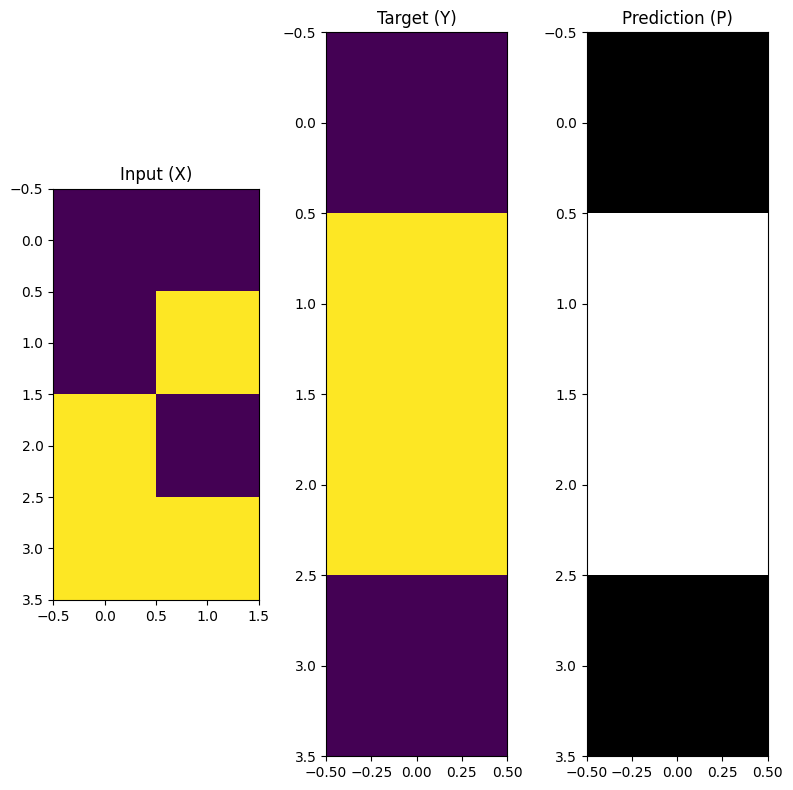

In [22]:
model.eval()
with torch.no_grad():
    P = model(X.to(device))

fig, axes = plt.subplots(1, 3, figsize=(8, 8))

# Plot X
axes[0].imshow(X)
axes[0].set_title('Input (X)')

# Plot Y
axes[1].imshow(Y)
axes[1].set_title('Target (Y)')

# Plot P
axes[2].imshow(P.cpu().numpy() > 0.5, cmap='gray') # Threshold output for visualization
axes[2].set_title('Prediction (P)')

plt.tight_layout()
#plt.show()
